In [1]:
from __future__ import absolute_import, division, print_function

import tensorflow as tf
tf.enable_eager_execution()
tf.VERSION

'1.12.0'

## Import data

In [2]:
import pathlib

DATADIR = 'D:/257_data/labeling_data'
data_root = pathlib.Path(DATADIR)

In [3]:
all_image_paths = list(data_root.glob('*/*/*/*/*.jpg'))
all_image_paths = [str(path) for path in all_image_paths]

all_xml_paths = list(data_root.glob('*/*/*/*/*.xml'))
all_xml_paths = [str(path) for path in all_xml_paths]

image_count = len(all_image_paths)
xml_count = len(all_xml_paths)
image_count + xml_count

1924

In [4]:
all_image_paths[:10] + all_xml_paths[:10]

['D:\\257_data\\labeling_data\\Images\\users\\kles90105\\257_data_set\\100n.jpg',
 'D:\\257_data\\labeling_data\\Images\\users\\kles90105\\257_data_set\\100p.jpg',
 'D:\\257_data\\labeling_data\\Images\\users\\kles90105\\257_data_set\\101n.jpg',
 'D:\\257_data\\labeling_data\\Images\\users\\kles90105\\257_data_set\\101p.jpg',
 'D:\\257_data\\labeling_data\\Images\\users\\kles90105\\257_data_set\\102n.jpg',
 'D:\\257_data\\labeling_data\\Images\\users\\kles90105\\257_data_set\\102p.jpg',
 'D:\\257_data\\labeling_data\\Images\\users\\kles90105\\257_data_set\\103n.jpg',
 'D:\\257_data\\labeling_data\\Images\\users\\kles90105\\257_data_set\\103p.jpg',
 'D:\\257_data\\labeling_data\\Images\\users\\kles90105\\257_data_set\\104n.jpg',
 'D:\\257_data\\labeling_data\\Images\\users\\kles90105\\257_data_set\\104p.jpg',
 'D:\\257_data\\labeling_data\\Annotations\\users\\kles90105\\257_data_set\\100n.xml',
 'D:\\257_data\\labeling_data\\Annotations\\users\\kles90105\\257_data_set\\100p.xml',
 'D:\\

In [5]:
import IPython.display as display

def caption_image(image_path):
    image_rel = pathlib.Path(image_path).relative_to(data_root)
    return image_rel
    

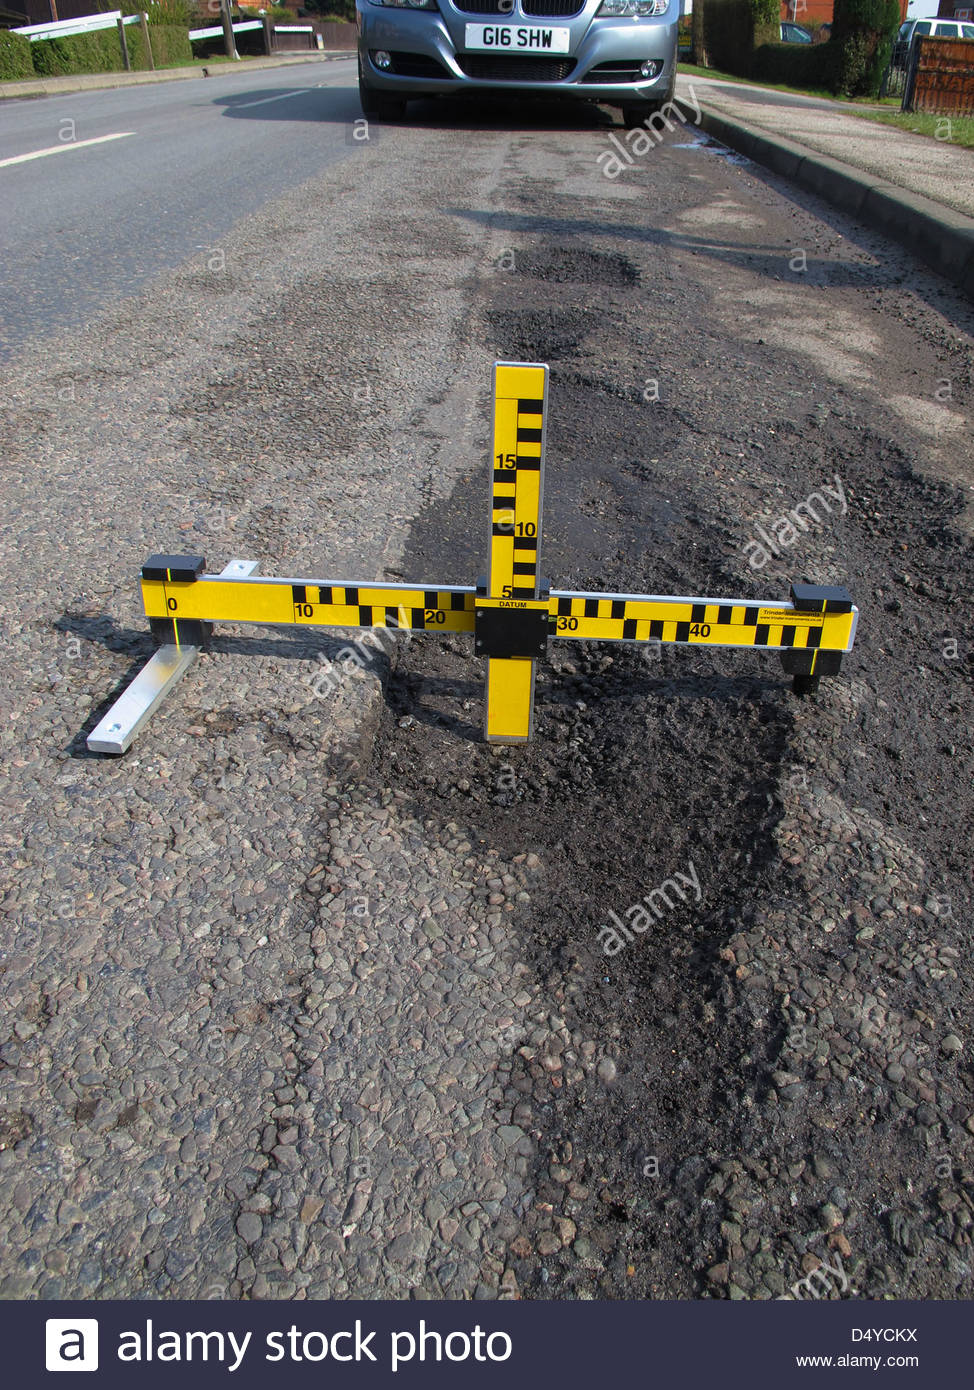

Images\users\kles90105\257_data_set\pwy0028.jpg


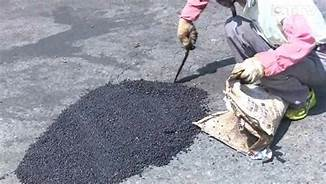

Images\users\kles90105\257_data_set\107p.jpg


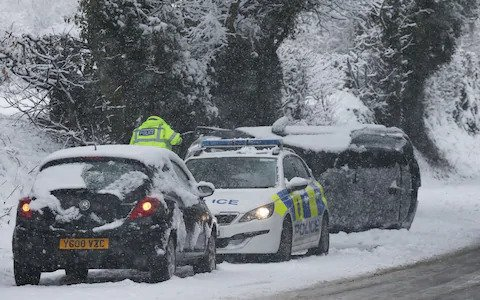

Images\users\kles90105\257_data_set\pwy0076.jpg


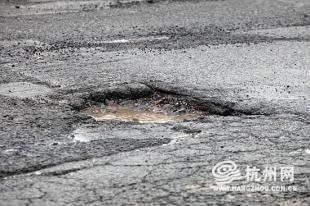

Images\users\kles90105\257_data_set\273p.jpg


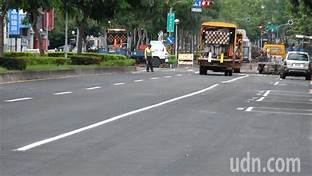

Images\users\kles90105\257_data_set\2n.jpg


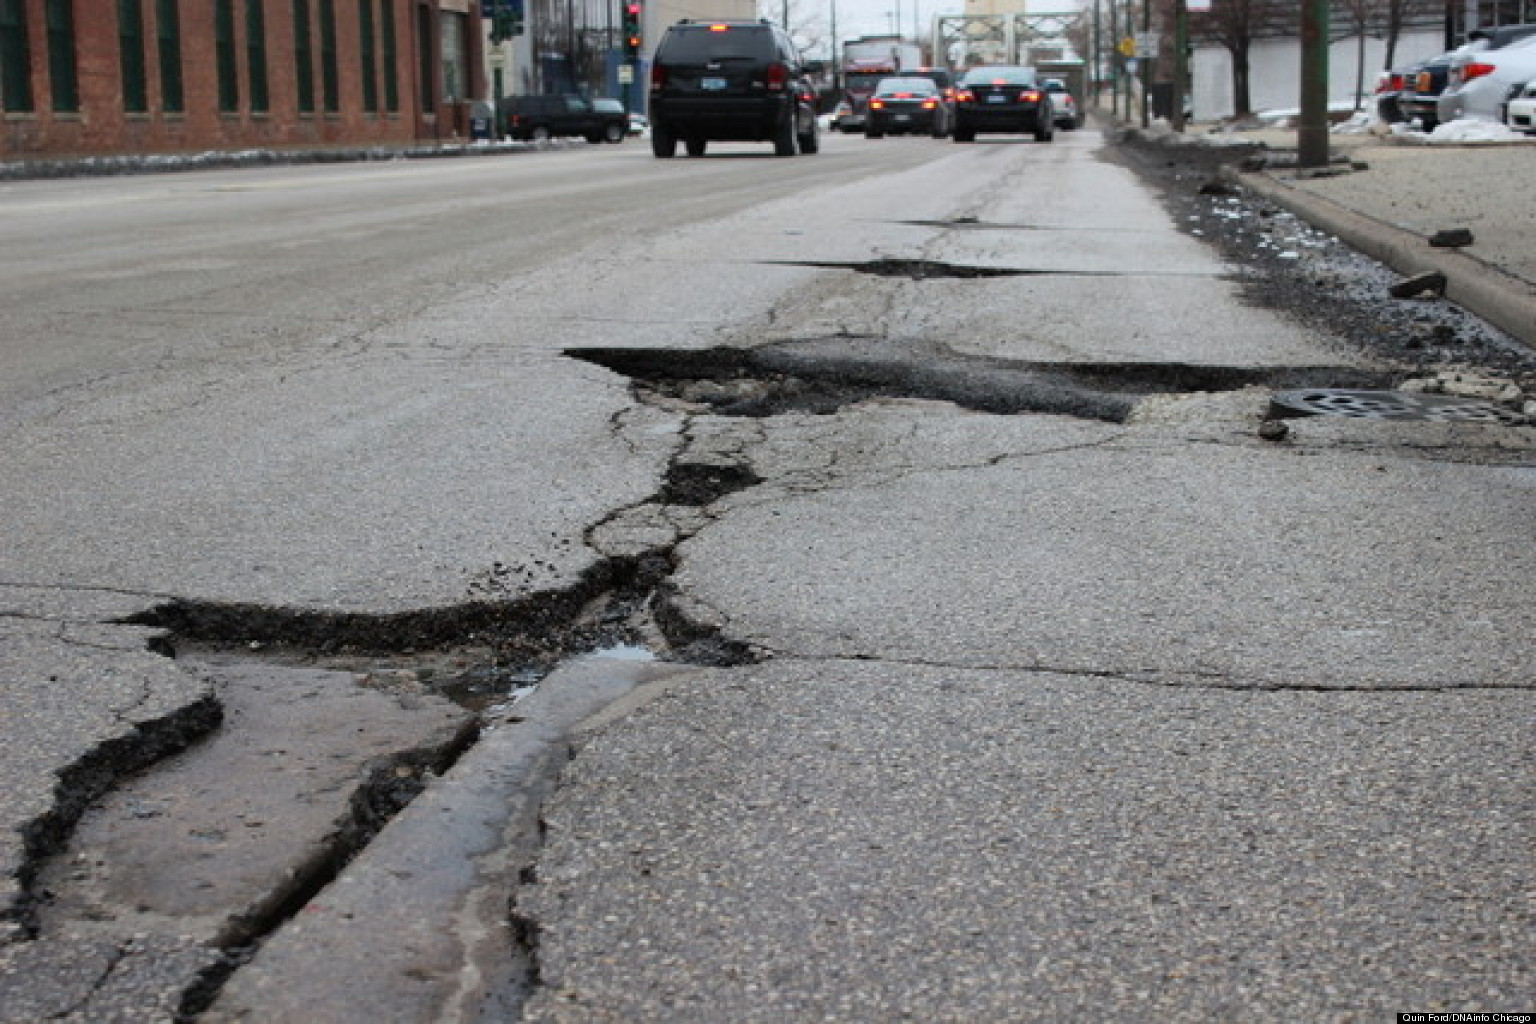

Images\users\kles90105\Positive Images\119.jpg


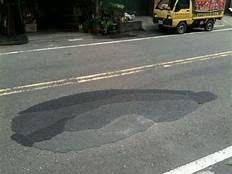

Images\users\kles90105\257_data_set\103p.jpg


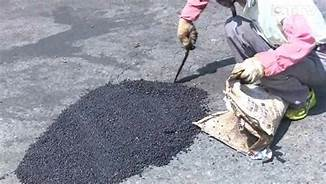

Images\users\kles90105\257_data_set\107p.jpg


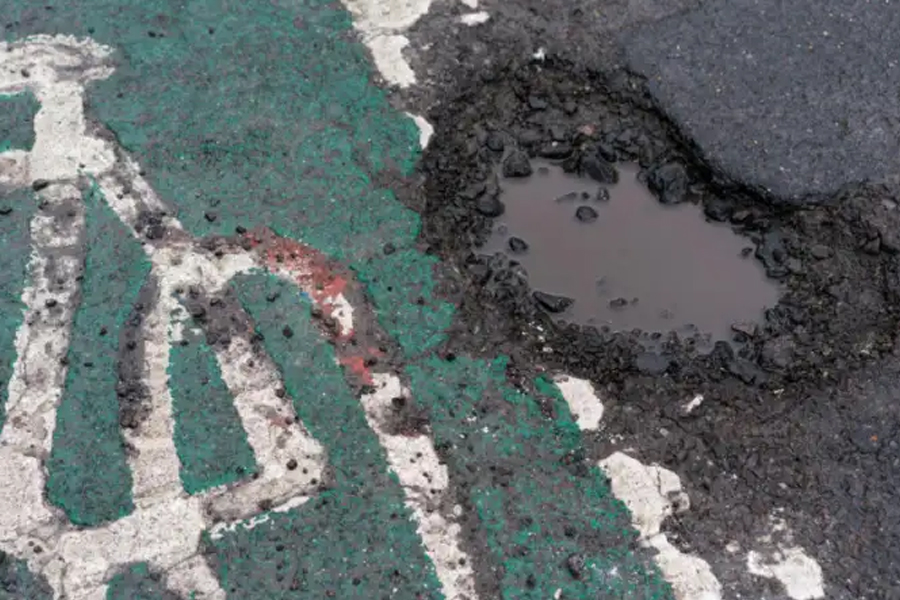

Images\users\kles90105\257_data_set\pwy0063.jpg


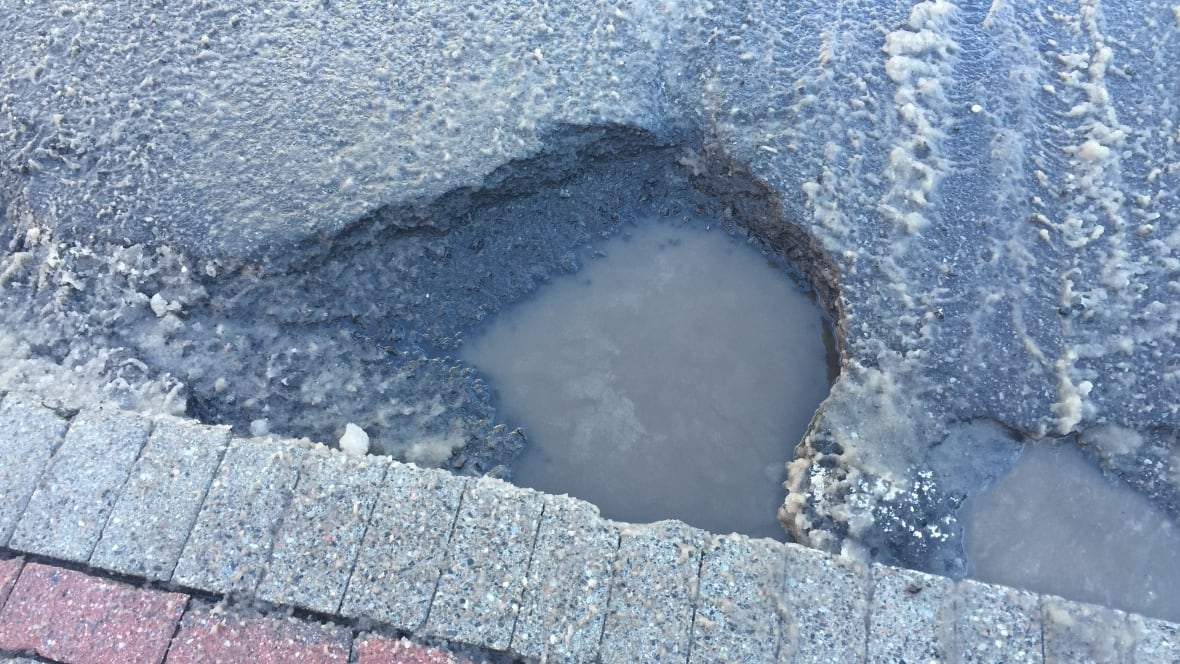

Images\users\kles90105\Positive Images\120.jpg


In [6]:
import random

for n in range(10):
  image_path = random.choice(all_image_paths)
  display.display(display.Image(image_path))
  print(caption_image(image_path))

In [7]:
import xml.etree.ElementTree as ET
import numpy as np
from array import *
from PIL import Image
import uuid

def xml_tree(x):
    for child in x:
        if(child.getchildren() == []):
            print(child.tag, ":", child.text)
        else:
            print(child.tag)
            xml_tree(child)

for i in range(len(all_image_paths)):
    tree = ET.parse(all_xml_paths[i])
    root = tree.getroot()
    xml_tree(root)
    print("")

    objs = root.findall("./object")

    x_list = []
    y_list = []
    for co in objs:
        print(co.find("./name").text)
        for node in co.findall("./polygon/pt"):
            print("point")
            children = node.getchildren()
            x = children[0].text
            y = children[1].text
            x_list.append(int(float(x)))
            y_list.append(int(float(y)))
            print(int(float(x)), int(float(y)))
        print("top-left", min(x_list), min(y_list))
        print("bottom-right", max(x_list), max(y_list))
        print()
    
        im = Image.open(all_image_paths[i])
        if(str(co.find("./name").text) == 'no pothole'):
            outfile = 'training_objects/pothole0-%s.png' % (str(uuid.uuid4()))
        elif(str(co.find("./name").text) == 'pothole'):
            print(co.find("./attributes").text)
            if(co.find("./attributes").text == None):
                outfile = 'training_objects/pothole3-%s.png' % (str(uuid.uuid4()))
            else:
                outfile = 'training_objects/pothole%s-%s.png' % (str(co.find("./attributes").text), str(uuid.uuid4()))
        else:
            if(str(co.find("./name").text) == 'pothole1' or str(co.find("./name").text) == 'pothole2' 
               or str(co.find("./name").text) == 'pothole3' or str(co.find("./name").text) == 'pothole4'):
                outfile = 'training_objects/%s-%s.png' % (str(co.find("./name").text), str(uuid.uuid4()))
            elif(str(co.find("./name").text) == 'crack'):
                outfile = 'training_objects/pothole1-%s.png' % (str(uuid.uuid4()))
            else:
                outfile = 'training_objects/pothole0-%s.png' % (str(uuid.uuid4()))
        im.crop((min(x_list), min(y_list), max(x_list), max(y_list))).resize((640, 640)).save(outfile)
        print("Save as:", outfile)
        print()
        
        x_list = []
        y_list = []
    

filename : 100n.jpg
folder : users/robert4213//pothole_data/training_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 800
ncols : 1200
object
name : paint
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 06:03:48
id : 0
polygon
username : anonymous
pt
x : 836
y : 508
pt
x : 825
y : 513
pt
x : 1052
y : 621
pt
x : 1089
y : 616
pt
x : 1074
y : 600

paint
point
836 508
point
825 513
point
1052 621
point
1089 616
point
1074 600
top-left 825 508
bottom-right 1089 621

Save as: training_objects/pothole0-52ac4829-980b-4d7b-8ceb-20e7aa6252aa.png

filename : 100p.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 167
ncols : 250
object
name : pothole4
deleted : 0
verified : 0
occluded : yes
attributes : None
parts
hasparts : None
ispartof : None
date : 05-Apr-2019 20:01:53
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 25
y : 128
pt
x : 137
y : 128
pt
x : 137
y : 160
p

Save as: training_objects/pothole1-b25dbf5a-fd1c-4659-a1fa-94f187467a64.png

filename : 106n.jpg
folder : users/robert4213//pothole_data/training_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 600
ncols : 600
object
name : manhole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 06:07:21
id : 0
type : bounding_box
polygon
username : anonymous
pt
x : 254
y : 303
pt
x : 313
y : 303
pt
x : 313
y : 324
pt
x : 254
y : 324

manhole
point
254 303
point
313 303
point
313 324
point
254 324
top-left 254 303
bottom-right 313 324

Save as: training_objects/pothole0-8dc6c2ae-6a50-4386-90b7-4c50a720c950.png

filename : 106p.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 300
ncols : 169
object
name : pothole2
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 05:35:47
id : 0
type : bounding_box
polygon
username : Ber

filename : 110p.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 151
ncols : 226
object
name : pothole4
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 05:36:11
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 32
y : 63
pt
x : 208
y : 63
pt
x : 208
y : 137
pt
x : 32
y : 137

pothole4
point
32 63
point
208 63
point
208 137
point
32 137
top-left 32 63
bottom-right 208 137

Save as: training_objects/pothole4-e8cd648c-fe0a-47d5-ad17-1006f96ddba7.png

filename : 111n.jpg
folder : users/robert4213//pothole_data/training_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 533
ncols : 800
object
name : shadow
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 06:08:21
id : 0
type : bounding_box
polygon
username : anonymous
pt
x : 252
y : 389
pt
x : 430
y : 389
pt
x : 430
y : 427
pt
x : 252
y : 427
object
na

filename : 115p.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 158
ncols : 210
object
name : pothole4
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 05-Apr-2019 20:05:41
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 126
y : 95
pt
x : 41
y : 95
pt
x : 41
y : 60
pt
x : 126
y : 60

pothole4
point
126 95
point
41 95
point
41 60
point
126 60
top-left 41 60
bottom-right 126 95

Save as: training_objects/pothole4-70c0b1e1-d3e3-4f50-9370-ac051dedb906.png

filename : 116p.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 158
ncols : 159
object
name : pothole3
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 05:37:04
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 108
y : 4
pt
x : 132
y : 4
pt
x : 132
y : 13
pt
x : 108
y : 13
object
name : pothole3
deleted : 

Save as: training_objects/pothole3-7c833a54-29ad-44d9-b6f3-93d9a14b85b0.png

pothole2
point
15 123
point
108 123
point
108 164
point
15 164
top-left 15 123
bottom-right 108 164

Save as: training_objects/pothole2-9d263998-5f0b-4ee8-8ef5-9438d8c952d9.png

filename : 118p.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 150
ncols : 200
object
name : pothole1
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 05:44:54
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 140
y : 130
pt
x : 192
y : 130
pt
x : 192
y : 150
pt
x : 140
y : 150

pothole1
point
140 130
point
192 130
point
192 150
point
140 150
top-left 140 130
bottom-right 192 150

Save as: training_objects/pothole1-99448001-5a4c-4c7a-b941-094b3ab64506.png

filename : 119p.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 175
ncols : 233
object
name : pothole4
deleted

Save as: training_objects/pothole2-0a9caacd-062e-4424-a85f-dd7de76e0b4b.png

pothole0
point
108 22
point
158 22
point
158 65
point
108 65
top-left 108 22
bottom-right 158 65

Save as: training_objects/pothole0-2db82582-06ac-4b9e-88f9-bd3e6df9dc9b.png

filename : 127p.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 800
ncols : 600
object
name : pothole1
deleted : 1
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 05-Apr-2019 20:07:32
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 143
y : 353
pt
x : 416
y : 353
pt
x : 416
y : 598
pt
x : 143
y : 598
object
name : pothole1
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 05-Apr-2019 20:07:40
id : 1
type : bounding_box
polygon
username : Bert
pt
x : 29
y : 292
pt
x : 593
y : 292
pt
x : 593
y : 794
pt
x : 29
y : 794

pothole1
point
143 353
point
416 353
point
416 598
point
143 598
top-left

top-left 55 91
bottom-right 82 107

Save as: training_objects/pothole2-88ec48b1-d8b0-437e-a47e-dd3906e1444d.png

filename : 134p.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 262
ncols : 370
object
name : pothole2
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 05:51:00
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 168
y : 224
pt
x : 251
y : 224
pt
x : 251
y : 245
pt
x : 168
y : 245

pothole2
point
168 224
point
251 224
point
251 245
point
168 245
top-left 168 224
bottom-right 251 245

Save as: training_objects/pothole2-a44b78a5-a5fe-43fc-8229-149f265ee9b3.png

filename : 135p.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 1712
ncols : 2560
object
name : pothole4
deleted : 0
verified : 0
occluded : yes
attributes : None
parts
hasparts : None
ispartof : None
date : 05-Apr-2019 20:08:36
id : 0
type : bounding_

point
233 71
point
204 71
top-left 204 62
bottom-right 233 71

Save as: training_objects/pothole1-8a1fc93e-8b9d-4d82-a70e-1ccfb407161b.png

filename : 142p.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 168
ncols : 299
object
name : pothole4
deleted : 0
verified : 0
occluded : yes
attributes : None
parts
hasparts : None
ispartof : None
date : 05-Apr-2019 20:10:38
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 38
y : 91
pt
x : 186
y : 91
pt
x : 186
y : 114
pt
x : 38
y : 114
object
name : pothole4
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 05-Apr-2019 20:10:47
id : 1
type : bounding_box
polygon
username : Bert
pt
x : 59
y : 123
pt
x : 203
y : 123
pt
x : 203
y : 166
pt
x : 59
y : 166

pothole4
point
38 91
point
186 91
point
186 114
point
38 114
top-left 38 91
bottom-right 186 114

Save as: training_objects/pothole4-4c4b8749-5810-401c-9144-304fc216e988.png

pothole4
poin

filename : 149p.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 259
ncols : 194
object
name : pothole3
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 05-Apr-2019 20:13:33
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 64
y : 99
pt
x : 167
y : 99
pt
x : 167
y : 124
pt
x : 64
y : 124

pothole3
point
64 99
point
167 99
point
167 124
point
64 124
top-left 64 99
bottom-right 167 124

Save as: training_objects/pothole3-10347a3e-37eb-47bf-ab99-18b05688391b.png

filename : 14n.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 172
ncols : 305
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 06:03:40
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 46
y : 110
pt
x : 86
y : 110
pt
x : 86
y : 162
pt
x : 46
y : 162

pothole0
point
46 110
poin

Save as: training_objects/pothole3-c7b1a07f-57f6-44f8-99c0-9b4d0b06a602.png

pothole3
point
145 51
point
172 51
point
172 58
point
145 58
top-left 145 51
bottom-right 172 58

Save as: training_objects/pothole3-d8a37562-7867-46b8-b557-b74785bc1c2b.png

pothole3
point
128 51
point
140 51
point
140 55
point
128 55
top-left 128 51
bottom-right 140 55

Save as: training_objects/pothole3-05c42592-0926-47f2-bf5b-44596e54e125.png

pothole3
point
133 47
point
153 47
point
153 52
point
133 52
top-left 133 47
bottom-right 153 52

Save as: training_objects/pothole3-5d4d16ca-46aa-4eae-ab89-0f8577902311.png

pothole3
point
105 52
point
121 52
point
121 57
point
105 57
top-left 105 52
bottom-right 121 57

Save as: training_objects/pothole3-8980f260-16cf-43ed-9d3f-46210d55e7d3.png

pothole3
point
123 43
point
144 43
point
144 48
point
123 48
top-left 123 43
bottom-right 144 48

Save as: training_objects/pothole3-28b30330-ba21-4218-9d31-a361daa0e38d.png

filename : 156p.jpg
folder : users/kles90105//25

filename : 165p.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 163
ncols : 217
object
name : pothole2
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 05-Apr-2019 20:18:57
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 50
y : 37
pt
x : 170
y : 37
pt
x : 170
y : 96
pt
x : 50
y : 96

pothole2
point
50 37
point
170 37
point
170 96
point
50 96
top-left 50 37
bottom-right 170 96

Save as: training_objects/pothole2-e0ef8da0-dd54-40a3-b0c6-419986e8cd7a.png

filename : 166p.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 163
ncols : 217
object
name : pothole3
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 05-Apr-2019 20:19:07
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 9
y : 61
pt
x : 169
y : 61
pt
x : 169
y : 142
pt
x : 9
y : 142

pothole3
point
9 61
point
169 61

filename : 174p.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 158
ncols : 237
object
name : pothole3
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 05-Apr-2019 20:21:12
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 20
y : 60
pt
x : 217
y : 60
pt
x : 217
y : 124
pt
x : 20
y : 124
object
name : pothole3
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 05-Apr-2019 20:21:15
id : 1
type : bounding_box
polygon
username : Bert
pt
x : 46
y : 32
pt
x : 135
y : 32
pt
x : 135
y : 56
pt
x : 46
y : 56
object
name : pothole3
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 05-Apr-2019 20:21:19
id : 2
type : bounding_box
polygon
username : Bert
pt
x : 67
y : 20
pt
x : 100
y : 20
pt
x : 100
y : 30
pt
x : 67
y : 30
object
name : pothole3
deleted : 0
verified : 0
occluded : no
attri

3
Save as: training_objects/pothole3-e7351529-cad8-40d3-95e7-1d9dedb8e96e.png

pothole
point
323 206
point
413 206
point
413 228
point
323 228
top-left 323 206
bottom-right 413 228

3
Save as: training_objects/pothole3-06df9eb0-6838-4ec1-9845-5d65f07a7382.png

pothole
point
344 247
point
414 247
point
414 272
point
344 272
top-left 344 247
bottom-right 414 272

2
Save as: training_objects/pothole2-8cc6fd9a-c5ff-4e53-bf5c-53aeff589db6.png

pothole
point
41 226
point
111 226
point
111 238
point
41 238
top-left 41 226
bottom-right 111 238

2
Save as: training_objects/pothole2-97c6c0f9-293d-4c88-b85a-ff900dad9290.png

filename : 181p.jpg
folder : users/robert4213//pothole_data/training_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 270
ncols : 357
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 2
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 03:32:34
id : 0
type : bounding_box
polygon
username : Shiyan Cai
pt
x : 2
y : 82
pt
x : 300
y : 82
pt
x 

filename : 188p.jpg
folder : users/robert4213//pothole_data/training_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 459
ncols : 690
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 3
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 06:58:13
id : 0
type : bounding_box
polygon
username : Shiyan Cai
pt
x : 80
y : 379
pt
x : 333
y : 379
pt
x : 333
y : 436
pt
x : 80
y : 436
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 3
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 06:58:24
id : 1
type : bounding_box
polygon
username : Shiyan Cai
pt
x : 215
y : 442
pt
x : 375
y : 442
pt
x : 375
y : 458
pt
x : 215
y : 458

pothole
point
80 379
point
333 379
point
333 436
point
80 436
top-left 80 379
bottom-right 333 436

3
Save as: training_objects/pothole3-01d869d5-1ba2-40e0-beab-1318b605472d.png

pothole
point
215 442
point
375 442
point
375 458
point
215 458
top-left 215 442
bottom-right 375 458

3
Save as: training_objects/p

2
Save as: training_objects/pothole2-0f650f5f-1931-446c-b5c7-a1415533d534.png

filename : 198p.jpg
folder : users/robert4213//pothole_data/training_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 1024
ncols : 768
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 4
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 07:01:38
id : 0
type : bounding_box
polygon
username : Shiyan Cai
pt
x : 739
y : 316
pt
x : 6
y : 316
pt
x : 6
y : 515
pt
x : 739
y : 515

pothole
point
739 316
point
6 316
point
6 515
point
739 515
top-left 6 316
bottom-right 739 515

4
Save as: training_objects/pothole4-573fc9c9-6008-4d47-bd3f-7871cddc3c56.png

filename : 199p.jpg
folder : users/robert4213//pothole_data/training_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 364
ncols : 550
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 2
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 07:05:57
id : 0
type : bounding_box
polygon
username : Shiy

filename : 206p.jpg
folder : users/robert4213//pothole_data/training_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 541
ncols : 960
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 3
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 07:08:01
id : 0
type : bounding_box
polygon
username : Shiyan Cai
pt
x : 226
y : 133
pt
x : 641
y : 133
pt
x : 641
y : 321
pt
x : 226
y : 321

pothole
point
226 133
point
641 133
point
641 321
point
226 321
top-left 226 133
bottom-right 641 321

3
Save as: training_objects/pothole3-cdab1682-074a-4439-8d0a-9978888a7cec.png

filename : 207p.jpg
folder : users/robert4213//pothole_data/training_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 1200
ncols : 800
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 3
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 07:08:18
id : 0
type : bounding_box
polygon
username : Shiyan Cai
pt
x : 216
y : 860
pt
x : 426
y : 860
pt
x : 426
y : 710
pt
x 

Save as: training_objects/pothole1-6c0960d3-60e2-4c3a-abd0-03fc714fa22c.png

filename : 213p.jpg
folder : users/robert4213//pothole_data/training_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 300
ncols : 450
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 1
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 07:10:24
id : 0
type : bounding_box
polygon
username : Shiyan Cai
pt
x : 3
y : 76
pt
x : 443
y : 76
pt
x : 443
y : 284
pt
x : 3
y : 284

pothole
point
3 76
point
443 76
point
443 284
point
3 284
top-left 3 76
bottom-right 443 284

1
Save as: training_objects/pothole1-8a26d570-77f4-48d2-a537-c70258c2aa48.png

filename : 214p.jpg
folder : users/robert4213//pothole_data/training_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 300
ncols : 546
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 1
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 07:10:46
id : 0
polygon
username : Shiyan Cai
pt
x : 472
y : 4
pt
x

deleted : 0
verified : 0
occluded : no
attributes : 4
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 07:12:48
id : 0
type : bounding_box
polygon
username : Shiyan Cai
pt
x : 87
y : 91
pt
x : 219
y : 91
pt
x : 219
y : 159
pt
x : 87
y : 159

pothole
point
87 91
point
219 91
point
219 159
point
87 159
top-left 87 91
bottom-right 219 159

4
Save as: training_objects/pothole4-855c313c-2e65-4e33-9d57-0cab9bdd9e1c.png

filename : 221p.jpg
folder : users/robert4213//pothole_data/training_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 375
ncols : 500
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 2
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 07:12:55
id : 0
type : bounding_box
polygon
username : Shiyan Cai
pt
x : 279
y : 297
pt
x : 360
y : 297
pt
x : 360
y : 328
pt
x : 279
y : 328
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 3
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 07:12:59
id : 1
type : bou

ispartof : None
date : 18-Mar-2019 07:17:30
id : 1
type : bounding_box
polygon
username : Shiyan Cai
pt
x : 163
y : 247
pt
x : 233
y : 247
pt
x : 233
y : 277
pt
x : 163
y : 277
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 2
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 07:17:36
id : 2
type : bounding_box
polygon
username : Shiyan Cai
pt
x : 328
y : 206
pt
x : 368
y : 206
pt
x : 368
y : 223
pt
x : 328
y : 223

pothole
point
15 196
point
593 196
point
593 449
point
15 449
top-left 15 196
bottom-right 593 449

1
Save as: training_objects/pothole1-d14e2f57-84e9-48eb-998b-d705f3df3af8.png

pothole
point
163 247
point
233 247
point
233 277
point
163 277
top-left 163 247
bottom-right 233 277

2
Save as: training_objects/pothole2-74824f0a-02c6-4df1-9c17-cf56be07ccbb.png

pothole
point
328 206
point
368 206
point
368 223
point
328 223
top-left 328 206
bottom-right 368 223

2
Save as: training_objects/pothole2-e78161ea-ef0d-467d-8fee-7984204e4fcc.png

file

2
Save as: training_objects/pothole2-55c6f146-ac19-45de-b834-33fe967c32c7.png

filename : 233p.jpg
folder : users/robert4213//pothole_data/training_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 300
ncols : 400
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 1
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 07:19:58
id : 0
polygon
username : Shiyan Cai
pt
x : 194
y : 99
pt
x : 51
y : 121
pt
x : 1
y : 161
pt
x : 3
y : 181
pt
x : 166
y : 250
pt
x : 399
y : 261
pt
x : 397
y : 191

pothole
point
194 99
point
51 121
point
1 161
point
3 181
point
166 250
point
399 261
point
397 191
top-left 1 99
bottom-right 399 261

1
Save as: training_objects/pothole1-d5d1e9c6-4700-4c64-8906-a6ae90f556b0.png

filename : 234p.jpg
folder : users/robert4213//pothole_data/training_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 610
ncols : 500
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 3
parts
hasparts : None
ispartof : None
date 

name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 4
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 07:22:22
id : 0
polygon
username : Shiyan Cai
pt
x : 163
y : 176
pt
x : 225
y : 174
pt
x : 328
y : 209
pt
x : 243
y : 226
pt
x : 168
y : 178

pothole
point
163 176
point
225 174
point
328 209
point
243 226
point
168 178
top-left 163 174
bottom-right 328 226

4
Save as: training_objects/pothole4-c9869a24-5e01-4d9b-9592-eb09252f153c.png

filename : 246p.jpg
folder : users/robert4213//pothole_data/training_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 375
ncols : 500
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 1
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 07:22:32
id : 0
polygon
username : Shiyan Cai
pt
x : 78
y : 61
pt
x : 346
y : 374
pt
x : 456
y : 367
pt
x : 92
y : 56

pothole
point
78 61
point
346 374
point
456 367
point
92 56
top-left 78 56
bottom-right 456 374

1
Save as: training_objects/pothole1-eec294c8-1

1
Save as: training_objects/pothole1-a1282a6b-1a60-4cf7-9c30-7cb3e3515dc4.png

filename : 255p.jpg
folder : users/robert4213//pothole_data/training_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 312
ncols : 550
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 3
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 07:23:52
id : 0
type : bounding_box
polygon
username : Shiyan Cai
pt
x : 249
y : 149
pt
x : 489
y : 149
pt
x : 489
y : 298
pt
x : 249
y : 298
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 3
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 07:24:01
id : 1
type : bounding_box
polygon
username : Shiyan Cai
pt
x : 224
y : 134
pt
x : 20
y : 134
pt
x : 20
y : 238
pt
x : 224
y : 238

pothole
point
249 149
point
489 149
point
489 298
point
249 298
top-left 249 149
bottom-right 489 298

3
Save as: training_objects/pothole3-16a93105-4317-474e-a908-0bf751b315bc.png

pothole
point
224 134
point
20 134
point
20 238
po

Save as: training_objects/pothole1-24cdef40-2592-4790-a4d1-37754923e4b3.png

filename : 264p.jpg
folder : users/robert4213//pothole_data/training_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 360
ncols : 480
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 3
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 07:25:44
id : 0
type : bounding_box
polygon
username : Shiyan Cai
pt
x : 351
y : 131
pt
x : 34
y : 131
pt
x : 34
y : 346
pt
x : 351
y : 346

pothole
point
351 131
point
34 131
point
34 346
point
351 346
top-left 34 131
bottom-right 351 346

3
Save as: training_objects/pothole3-b2cb993c-f6ed-49f0-9192-1a2703475cb6.png

filename : 265p.jpg
folder : users/robert4213//pothole_data/training_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 900
ncols : 900
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 3
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 07:25:49
id : 0
type : bounding_box
polygon
username : Sh

Save as: training_objects/pothole3-6e59560b-79e7-46a1-861b-9093ad91c9a1.png

filename : 274p.jpg
folder : users/robert4213//pothole_data/training_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 225
ncols : 300
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 3
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 07:26:56
id : 0
polygon
username : Shiyan Cai
pt
x : 299
y : 170
pt
x : 180
y : 112
pt
x : 25
y : 118
pt
x : 21
y : 210

pothole
point
299 170
point
180 112
point
25 118
point
21 210
top-left 21 112
bottom-right 299 210

3
Save as: training_objects/pothole3-a5f382c9-1016-415c-aefc-374d684ee387.png

filename : 275p.jpg
folder : users/robert4213//pothole_data/training_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 332
ncols : 500
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 3
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 07:27:02
id : 0
type : bounding_box
polygon
username : Shiyan Cai
pt
x : 118


occluded : no
attributes : 3
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 07:28:37
id : 0
type : bounding_box
polygon
username : Shiyan Cai
pt
x : 182
y : 174
pt
x : 339
y : 174
pt
x : 339
y : 245
pt
x : 182
y : 245

pothole
point
182 174
point
339 174
point
339 245
point
182 245
top-left 182 174
bottom-right 339 245

3
Save as: training_objects/pothole3-166dc05f-b59c-4275-895b-cf302e1a5bbd.png

filename : 286p.jpg
folder : users/robert4213//pothole_data/training_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 225
ncols : 300
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 2
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 07:28:41
id : 0
type : bounding_box
polygon
username : Shiyan Cai
pt
x : 120
y : 102
pt
x : 168
y : 102
pt
x : 168
y : 124
pt
x : 120
y : 124
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 2
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 07:28:44
id : 1
type : bounding_box
polyg

filename : 293p.jpg
folder : users/robert4213//pothole_data/training_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 450
ncols : 600
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 3
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 07:30:36
id : 0
polygon
username : Shiyan Cai
pt
x : 392
y : 181
pt
x : 229
y : 309
pt
x : 443
y : 328
pt
x : 537
y : 198
pt
x : 398
y : 175

pothole
point
392 181
point
229 309
point
443 328
point
537 198
point
398 175
top-left 229 175
bottom-right 537 328

3
Save as: training_objects/pothole3-7830c98a-f8c9-41c9-be90-21d2b42654ad.png

filename : 294p.jpg
folder : users/robert4213//pothole_data/training_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 610
ncols : 495
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 3
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 07:30:44
id : 0
polygon
username : Shiyan Cai
pt
x : 27
y : 227
pt
x : 39
y : 272
pt
x : 387
y : 236
pt
x : 421
y : 

Save as: training_objects/pothole1-4ec38cbb-2d65-4518-9079-ed28c1bc2b16.png

pothole
point
15 195
point
15 554
point
260 514
point
246 354
point
595 357
point
621 465
point
996 389
point
988 269
top-left 15 195
bottom-right 996 554

1
Save as: training_objects/pothole1-94c17ab9-a532-48cf-9740-7e1296638b5f.png

filename : 301p.jpg
folder : users/robert4213//pothole_data/training_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 450
ncols : 600
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 3
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 07:32:54
id : 0
type : bounding_box
polygon
username : Shiyan Cai
pt
x : 219
y : 185
pt
x : 356
y : 185
pt
x : 356
y : 233
pt
x : 219
y : 233
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 3
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 07:32:58
id : 1
type : bounding_box
polygon
username : Shiyan Cai
pt
x : 283
y : 333
pt
x : 566
y : 333
pt
x : 566
y : 422
pt
x : 283
y : 42

Save as: training_objects/pothole3-ce526805-efca-4f9f-b288-89f1ca5ea9a8.png

pothole
point
25 92
point
246 92
point
246 157
point
25 157
top-left 25 92
bottom-right 246 157

3
Save as: training_objects/pothole3-8f6bae87-5e6b-490e-a69b-7909d76be631.png

pothole
point
19 29
point
90 29
point
90 66
point
19 66
top-left 19 29
bottom-right 90 66

2
Save as: training_objects/pothole2-45dd27b1-3784-41a7-8a44-87a78d46f04a.png

pothole
point
236 59
point
307 59
point
307 76
point
236 76
top-left 236 59
bottom-right 307 76

2
Save as: training_objects/pothole2-4ca3b051-246b-4914-8e09-44b6741a72a4.png

pothole
point
159 26
point
256 26
point
256 51
point
159 51
top-left 159 26
bottom-right 256 51

1
Save as: training_objects/pothole1-5f102977-1911-4633-91be-74fe7a5a1d90.png

filename : 306p.jpg
folder : users/robert4213//pothole_data/training_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 362
ncols : 566
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 3
parts
has

Save as: training_objects/pothole1-930e9651-0419-490f-8d26-273fdd1640a3.png

filename : 311p.jpg
folder : users/robert4213//pothole_data/training_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 800
ncols : 450
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 3
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 07:36:48
id : 0
type : bounding_box
polygon
username : Shiyan Cai
pt
x : 93
y : 108
pt
x : 333
y : 108
pt
x : 333
y : 637
pt
x : 93
y : 637

pothole
point
93 108
point
333 108
point
333 637
point
93 637
top-left 93 108
bottom-right 333 637

3
Save as: training_objects/pothole3-b123154e-e153-4852-971e-93ffc2c0815c.png

filename : 312p.jpg
folder : users/robert4213//pothole_data/training_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 562
ncols : 1000
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 2
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 07:36:55
id : 0
type : bounding_box
polygon
username : S

filename : 320p.jpg
folder : users/robert4213//pothole_data/training_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 300
ncols : 400
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 3
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 07:38:53
id : 0
type : bounding_box
polygon
username : Shiyan Cai
pt
x : 259
y : 173
pt
x : 352
y : 173
pt
x : 352
y : 218
pt
x : 259
y : 218
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 2
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 07:38:56
id : 1
type : bounding_box
polygon
username : Shiyan Cai
pt
x : 154
y : 129
pt
x : 207
y : 129
pt
x : 207
y : 152
pt
x : 154
y : 152
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 2
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 07:38:59
id : 2
type : bounding_box
polygon
username : Shiyan Cai
pt
x : 232
y : 109
pt
x : 259
y : 109
pt
x : 259
y : 118
pt
x : 232
y : 118
object
name : pothole
deleted : 0
v

Save as: training_objects/pothole3-25be6c33-0856-4a06-a8e1-fcc834e803cf.png

filename : 326p.jpg
folder : users/robert4213//pothole_data/training_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 263
ncols : 400
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 4
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 07:40:47
id : 0
type : bounding_box
polygon
username : Shiyan Cai
pt
x : 40
y : 89
pt
x : 395
y : 89
pt
x : 395
y : 250
pt
x : 40
y : 250

pothole
point
40 89
point
395 89
point
395 250
point
40 250
top-left 40 89
bottom-right 395 250

4
Save as: training_objects/pothole4-5e8a079c-9a02-46b7-837a-43d4a228e88b.png

filename : 327p.jpg
folder : users/robert4213//pothole_data/training_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 540
ncols : 692
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 4
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 07:41:05
id : 0
polygon
username : Shiyan Cai
pt
x : 332
y : 3

filename : 336p.jpg
folder : users/robert4213//pothole_data/training_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 256
ncols : 410
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 1
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 07:43:04
id : 0
polygon
username : Shiyan Cai
pt
x : 230
y : 100
pt
x : 44
y : 177
pt
x : 260
y : 105
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 3
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 07:43:20
id : 1
polygon
username : Shiyan Cai
pt
x : 326
y : 109
pt
x : 223
y : 253
pt
x : 119
y : 251
pt
x : 178
y : 164
pt
x : 246
y : 159
pt
x : 248
y : 128
pt
x : 262
y : 114
pt
x : 282
y : 98

pothole
point
230 100
point
44 177
point
260 105
top-left 44 100
bottom-right 260 177

1
Save as: training_objects/pothole1-b838a8d6-cb8b-4976-a502-2da4995f3c3a.png

pothole
point
326 109
point
223 253
point
119 251
point
178 164
point
246 159
point
248 128
point
262 114
point
282 98
top-left 

top-left 89 134
bottom-right 315 305

3
Save as: training_objects/pothole3-2d7b05d5-3e10-402f-a497-f54e5a99e809.png

filename : 344p.jpg
folder : users/robert4213//pothole_data/training_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 571
ncols : 428
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 3
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 07:46:58
id : 0
type : bounding_box
polygon
username : Shiyan Cai
pt
x : 134
y : 82
pt
x : 284
y : 82
pt
x : 284
y : 452
pt
x : 134
y : 452

pothole
point
134 82
point
284 82
point
284 452
point
134 452
top-left 134 82
bottom-right 284 452

3
Save as: training_objects/pothole3-c6102a80-a8f7-4f29-9488-6992b00a7633.png

filename : 345p.jpg
folder : users/robert4213//pothole_data/training_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 404
ncols : 720
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 3
parts
hasparts : None
ispartof : None
date : 18-Mar-2019 07:47:03
id : 0
t

Save as: training_objects/pothole1-b96fbc9a-5a0e-4241-a586-6355468a7657.png

pothole2
point
118 87
point
156 87
point
156 103
point
118 103
top-left 118 87
bottom-right 156 103

Save as: training_objects/pothole2-47d8b574-5ffa-4199-9335-9360b271eb8f.png

pothole1
point
71 60
point
115 60
point
115 84
point
71 84
top-left 71 60
bottom-right 115 84

Save as: training_objects/pothole1-9dfa7442-5486-4fca-8d9c-7ebe03d05076.png

pothole2
point
106 43
point
128 43
point
128 57
point
106 57
top-left 106 43
bottom-right 128 57

Save as: training_objects/pothole2-1fbc91e7-b470-4c6d-b84d-9e95d3482629.png

filename : 36n.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 157
ncols : 234
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 06:11:19
id : 0
polygon
username : Bert
pt
x : 94
y : 155
pt
x : 169
y : 2
pt
x : 155
y : 2
pt
x : 24
y : 156

pothole0
point
94 155

filename : 40p.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 168
ncols : 224
object
name : pothole2
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 05:00:52
id : 0
type : bounding_box
polygon
username : anonymous
pt
x : 14
y : 46
pt
x : 203
y : 46
pt
x : 203
y : 134
pt
x : 14
y : 134

pothole2
point
14 46
point
203 46
point
203 134
point
14 134
top-left 14 46
bottom-right 203 134

Save as: training_objects/pothole2-33f8c083-8c33-4d53-bd15-43c68ecbfdf0.png

filename : 41n.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 169
ncols : 225
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 05-Apr-2019 20:22:13
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 77
y : 96
pt
x : 123
y : 96
pt
x : 123
y : 117
pt
x : 77
y : 117

pothole0
point
77 96
p

Save as: training_objects/pothole4-d8b83c7f-704d-4820-9563-1a6618d8cd6d.png

filename : 48n.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 166
ncols : 241
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 05-Apr-2019 20:23:14
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 40
y : 42
pt
x : 201
y : 42
pt
x : 201
y : 147
pt
x : 40
y : 147

pothole0
point
40 42
point
201 42
point
201 147
point
40 147
top-left 40 42
bottom-right 201 147

Save as: training_objects/pothole0-9b9a6613-94fe-4e0e-821f-eed74e697fac.png

filename : 48p.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 338
ncols : 600
object
name : pothole4
deleted : 0
verified : 0
occluded : yes
attributes : None
parts
hasparts : None
ispartof : None
date : 05-Apr-2019 19:57:25
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 580
y : 31
pt
x

200 128
point
162 128
top-left 162 80
bottom-right 200 128

Save as: training_objects/pothole1-39fe18b9-aeed-4b4d-b202-a4b08be382b7.png

pothole2
point
143 16
point
175 16
point
175 30
point
143 30
top-left 143 16
bottom-right 175 30

Save as: training_objects/pothole2-96fb7c71-5e28-443c-b039-f7e29be1cfa2.png

pothole2
point
98 21
point
125 21
point
125 34
point
98 34
top-left 98 21
bottom-right 125 34

Save as: training_objects/pothole2-a7b65f53-c487-4f4e-8670-19af79a9cd80.png

pothole2
point
79 14
point
98 14
point
98 29
point
79 29
top-left 79 14
bottom-right 98 29

Save as: training_objects/pothole2-8a100eca-dd43-42de-9445-fac7d6dad835.png

pothole1
point
4 41
point
45 41
point
45 79
point
4 79
top-left 4 41
bottom-right 45 79

Save as: training_objects/pothole1-fd432490-9610-4cc5-bebc-4ae26687aae6.png

filename : 50n.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 167
ncols : 222
object
name : pothole0
deleted : 0
verified : 0
occl

Save as: training_objects/pothole2-1a865a5c-2b5f-4bd9-87a9-6429eb458eb6.png

pothole2
point
41 77
point
64 77
point
64 83
point
41 83
top-left 41 77
bottom-right 64 83

Save as: training_objects/pothole2-f7d50355-015b-4f25-a085-daefa03207c6.png

pothole2
point
120 78
point
145 78
point
145 84
point
120 84
top-left 120 78
bottom-right 145 84

Save as: training_objects/pothole2-f9422745-2bee-4327-bf2e-c8d4af6d3266.png

filename : 57n.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 162
ncols : 288
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 05-Apr-2019 20:24:22
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 122
y : 86
pt
x : 170
y : 86
pt
x : 170
y : 135
pt
x : 122
y : 135

pothole0
point
122 86
point
170 86
point
170 135
point
122 135
top-left 122 86
bottom-right 170 135

Save as: training_objects/pothole0-46e53778-2624-4707-b0d2-2617f0b8593f.png



Save as: training_objects/pothole3-7dc0d74e-3bc5-48fc-82f7-7b970b03db85.png

pothole3
point
178 165
point
207 165
point
207 184
point
178 184
top-left 178 165
bottom-right 207 184

Save as: training_objects/pothole3-38bab55a-d5d4-4413-a10f-0590a85bf021.png

filename : 61n.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 163
ncols : 289
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 05-Apr-2019 20:24:50
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 97
y : 71
pt
x : 171
y : 71
pt
x : 171
y : 86
pt
x : 97
y : 86

pothole0
point
97 71
point
171 71
point
171 86
point
97 86
top-left 97 71
bottom-right 171 86

Save as: training_objects/pothole0-e209a926-f70d-4974-bf6d-0dff34013bd0.png

filename : 61p.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 177
ncols : 314
object
name : pothole2
deleted : 0
verified 

filename : 68n.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 159
ncols : 211
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : sewer cover
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 06:05:51
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 31
y : 34
pt
x : 183
y : 34
pt
x : 183
y : 131
pt
x : 31
y : 131

pothole0
point
31 34
point
183 34
point
183 131
point
31 131
top-left 31 34
bottom-right 183 131

Save as: training_objects/pothole0-63cb181b-fff7-4cee-b10c-ecbde40214d6.png

filename : 68p.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 172
ncols : 257
object
name : pothole4
deleted : 0
verified : 0
occluded : yes
attributes : None
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 05:16:09
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 10
y : 76
pt
x : 242
y : 76
pt
x : 242
y : 171
pt
x : 10
y : 171

pothole4
point
10 7

filename : 74p.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 467
ncols : 700
object
name : pothole4
deleted : 0
verified : 0
occluded : yes
attributes : None
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 05:17:29
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 194
y : 314
pt
x : 615
y : 314
pt
x : 615
y : 457
pt
x : 194
y : 457

pothole4
point
194 314
point
615 314
point
615 457
point
194 457
top-left 194 314
bottom-right 615 457

Save as: training_objects/pothole4-701e1b93-abe3-4594-982e-5a7974584a2b.png

filename : 75n.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 156
ncols : 208
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : sewer cover
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 06:08:06
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 20
y : 20
pt
x : 172
y : 20
pt
x : 172
y : 154
pt
x : 20
y : 154

pothole0


Save as: training_objects/pothole0-0fd522d6-d136-427e-b011-7858a0f13d57.png

shadow
point
470 545
point
683 545
point
683 559
point
470 559
top-left 470 545
bottom-right 683 559

Save as: training_objects/pothole0-4a6df620-2bae-47d5-b32d-ba5680792e7a.png

filename : 78p.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 155
ncols : 209
object
name : pothole1
deleted : 0
verified : 0
occluded : yes
attributes : None
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 05:19:15
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 40
y : 60
pt
x : 168
y : 60
pt
x : 168
y : 129
pt
x : 40
y : 129

pothole1
point
40 60
point
168 60
point
168 129
point
40 129
top-left 40 60
bottom-right 168 129

Save as: training_objects/pothole1-8e603a00-e35d-4672-ae84-8a1ee4996248.png

filename : 79n.jpg
folder : users/robert4213//pothole_data/training_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 360
ncols : 640
object
name : shadow
deleted :

Save as: training_objects/pothole0-db97d652-ab03-4624-87c8-c9b33a78727f.png

filename : 81p.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 384
ncols : 512
object
name : pothole2
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 05:20:16
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 282
y : 225
pt
x : 499
y : 225
pt
x : 499
y : 372
pt
x : 282
y : 372
object
name : pothole3
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 05:20:27
id : 1
type : bounding_box
polygon
username : Bert
pt
x : 341
y : 148
pt
x : 401
y : 148
pt
x : 401
y : 174
pt
x : 341
y : 174
object
name : pothole2
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 05:20:31
id : 2
type : bounding_box
polygon
username : Bert
pt
x : 352
y : 188
pt
x : 365
y : 188
pt
x : 365
y 

Save as: training_objects/pothole0-97a621a9-415a-4f17-a0ad-470dbda03d8b.png

shadow
point
0 309
point
469 275
point
476 279
point
162 310
point
1 325
top-left 0 275
bottom-right 476 325

Save as: training_objects/pothole0-f6b01158-bab4-42ee-8596-ed4990f987ee.png

shadow
point
121 219
point
0 239
point
1 251
point
141 219
top-left 0 219
bottom-right 141 251

Save as: training_objects/pothole0-c0c073e9-74da-4124-99ac-5c09c92c7ad0.png

filename : 85p.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 300
ncols : 225
object
name : pothole1
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 05:21:19
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 130
y : 221
pt
x : 225
y : 221
pt
x : 225
y : 297
pt
x : 130
y : 297
object
name : pothole1
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 05:21:31
id : 1
type : b

filename : 90n.jpg
folder : users/robert4213//pothole_data/training_data
source
submittedBy : Shiyan Cai
imagesize
nrows : 600
ncols : 800
object
name : tunnel
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 05:56:15
id : 0
type : bounding_box
polygon
username : anonymous
pt
x : 320
y : 210
pt
x : 512
y : 210
pt
x : 512
y : 316
pt
x : 320
y : 316

tunnel
point
320 210
point
512 210
point
512 316
point
320 316
top-left 320 210
bottom-right 512 316

Save as: training_objects/pothole0-55ca61b5-aab7-4256-ab8e-a6accfb64904.png

filename : 90p.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 164
ncols : 247
object
name : pothole4
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 05-Apr-2019 20:00:11
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 30
y : 60
pt
x : 225
y : 60
pt
x : 225
y : 162
pt
x : 30
y : 162

pothol

deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 06:01:08
id : 0
type : bounding_box
polygon
username : anonymous
pt
x : 1
y : 248
pt
x : 52
y : 248
pt
x : 52
y : 261
pt
x : 1
y : 261
object
name : shadow
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 06:01:13
id : 1
type : bounding_box
polygon
username : anonymous
pt
x : 78
y : 224
pt
x : 115
y : 224
pt
x : 115
y : 230
pt
x : 78
y : 230
object
name : shadow
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 06:01:19
id : 2
type : bounding_box
polygon
username : anonymous
pt
x : 114
y : 208
pt
x : 152
y : 208
pt
x : 152
y : 216
pt
x : 114
y : 216

shadow
point
1 248
point
52 248
point
52 261
point
1 261
top-left 1 248
bottom-right 52 261

Save as: training_objects/pothole0-b40d5837-b505-4613-baf4-1265976475aa.png

shadow
point
78 224
point
115 

None
Save as: training_objects/pothole3-f1676eae-5375-4f9e-b2e1-069beed08977.png

pothole
point
18 252
point
261 252
point
261 333
point
18 333
top-left 18 252
bottom-right 261 333

None
Save as: training_objects/pothole3-ec7199ce-4f66-42a8-aad6-0fbc71883687.png

pothole
point
324 72
point
578 72
point
578 173
point
324 173
top-left 324 72
bottom-right 578 173

None
Save as: training_objects/pothole3-9e261150-4186-40b6-9ccf-9e91b1f08932.png

filename : pwy0003.jpg
folder : users/pwy0424//pothole/positive
source
submittedBy : Weiyang Pan
imagesize
nrows : 2026
ncols : 3000
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 00:49:50
id : 0
type : bounding_box
polygon
username : anonymous
pt
x : 647
y : 1090
pt
x : 1692
y : 1090
pt
x : 1692
y : 1416
pt
x : 647
y : 1416
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 00

Save as: training_objects/pothole3-c09c5bea-d763-470b-88b6-25fea8d4f005.png

noise
point
184 350
point
451 350
point
451 471
point
184 471
top-left 184 350
bottom-right 451 471

Save as: training_objects/pothole0-f0206533-2878-4c19-b365-1eb8704c2a8f.png

filename : pwy0011.jpg
folder : users/pwy0424//pothole/positive
source
submittedBy : Weiyang Pan
imagesize
nrows : 351
ncols : 624
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 03:23:52
id : 0
type : bounding_box
polygon
username : pwy0424
pt
x : 218
y : 231
pt
x : 417
y : 231
pt
x : 417
y : 341
pt
x : 218
y : 341
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 03:23:54
id : 1
type : bounding_box
polygon
username : pwy0424
pt
x : 546
y : 314
pt
x : 615
y : 314
pt
x : 615
y : 347
pt
x : 546
y : 347
object
name : pothole
deleted : 0
verified : 0
occluded : no
att

Save as: training_objects/pothole3-a4399885-a322-4fe0-87c9-e83a873e8585.png

pothole
point
369 336
point
660 336
point
660 424
point
369 424
top-left 369 336
bottom-right 660 424

None
Save as: training_objects/pothole3-3f13f99b-d358-40ff-98d3-8f70ab73b46b.png

filename : pwy0015.jpg
folder : users/pwy0424//pothole/positive
source
submittedBy : Weiyang Pan
imagesize
nrows : 350
ncols : 590
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 00:53:15
id : 0
type : bounding_box
polygon
username : anonymous
pt
x : 225
y : 280
pt
x : 344
y : 280
pt
x : 344
y : 342
pt
x : 225
y : 342
object
name : noise
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 00:53:19
id : 1
type : bounding_box
polygon
username : anonymous
pt
x : 36
y : 190
pt
x : 119
y : 190
pt
x : 119
y : 205
pt
x : 36
y : 205
object
name : noise
deleted : 0
verified : 0
occluded : n

filename : pwy0019.jpg
folder : users/pwy0424//pothole/positive
source
submittedBy : Weiyang Pan
imagesize
nrows : 520
ncols : 1410
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 00:54:56
id : 0
type : bounding_box
polygon
username : anonymous
pt
x : 540
y : 451
pt
x : 845
y : 451
pt
x : 845
y : 514
pt
x : 540
y : 514
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 00:54:59
id : 1
type : bounding_box
polygon
username : anonymous
pt
x : 882
y : 211
pt
x : 970
y : 211
pt
x : 970
y : 236
pt
x : 882
y : 236
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 00:55:03
id : 2
type : bounding_box
polygon
username : anonymous
pt
x : 795
y : 260
pt
x : 1074
y : 260
pt
x : 1074
y : 375
pt
x : 795
y : 375
object
name : pothole
deleted : 0
v

Save as: training_objects/pothole1-8bde8027-90eb-4eeb-b0fc-c0396353d169.png

pothole
point
77 135
point
237 135
point
237 508
point
77 508
top-left 77 135
bottom-right 237 508

None
Save as: training_objects/pothole3-4c9dc410-fa5b-47bc-9000-db45db90ed78.png

filename : pwy0022.jpg
folder : users/pwy0424//pothole/positive
source
submittedBy : Weiyang Pan
imagesize
nrows : 540
ncols : 960
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 00:57:03
id : 0
type : bounding_box
polygon
username : anonymous
pt
x : 376
y : 321
pt
x : 795
y : 321
pt
x : 795
y : 503
pt
x : 376
y : 503

pothole
point
376 321
point
795 321
point
795 503
point
376 503
top-left 376 321
bottom-right 795 503

None
Save as: training_objects/pothole3-409df5fc-32b0-4dc5-ae7b-57c60657213f.png

filename : pwy0023.jpg
folder : users/pwy0424//pothole/positive
source
submittedBy : Weiyang Pan
imagesize
nrows : 423
ncols : 306
object
name : po

None
Save as: training_objects/pothole3-72aa616e-2f51-45b2-80a3-a191d6d75c2e.png

pothole
point
251 189
point
317 189
point
317 242
point
251 242
top-left 251 189
bottom-right 317 242

None
Save as: training_objects/pothole3-acd45d3b-7f87-4821-bfe3-dc06018b91d8.png

pothole
point
62 235
point
167 235
point
167 278
point
62 278
top-left 62 235
bottom-right 167 278

None
Save as: training_objects/pothole3-2ebae5ab-e221-48d0-a5f3-dfef161c6861.png

pothole
point
206 185
point
335 185
point
335 246
point
206 246
top-left 206 185
bottom-right 335 246

None
Save as: training_objects/pothole3-b7050869-01c7-441d-b72d-d8016fb732bb.png

filename : pwy0027.jpg
folder : users/pwy0424//pothole/positive
source
submittedBy : Weiyang Pan
imagesize
nrows : 422
ncols : 634
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 00:59:17
id : 0
type : bounding_box
polygon
username : anonymous
pt
x : 183
y : 113
pt
x : 367
y : 

top-left 489 297
bottom-right 596 386

Save as: training_objects/pothole0-f54e52d1-4e46-459c-a279-6ab708752d25.png

crack
point
561 383
point
683 383
point
683 461
point
561 461
top-left 561 383
bottom-right 683 461

Save as: training_objects/pothole1-c27f7aa9-3e71-438f-b8e7-9030b2317971.png

crack
point
1036 211
point
1137 211
point
1137 302
point
1036 302
top-left 1036 211
bottom-right 1137 302

Save as: training_objects/pothole1-bc6e19cf-0cc7-4c52-b7d2-100698ec9144.png

crack
point
1057 620
point
1137 620
point
1137 736
point
1057 736
top-left 1057 620
bottom-right 1137 736

Save as: training_objects/pothole1-30ffdc05-a0c5-4f3f-b147-7932cc364408.png

crack
point
207 606
point
344 606
point
344 745
point
207 745
top-left 207 606
bottom-right 344 745

Save as: training_objects/pothole1-0b4295cb-24ba-454d-8742-b81ab5ed569b.png

filename : pwy0033.jpg
folder : users/pwy0424//pothole/positive
source
submittedBy : Weiyang Pan
imagesize
nrows : 354
ncols : 644
object
name : pothole
deleted

Save as: training_objects/pothole0-ddbb3673-d13d-40a5-8bb5-34a6b8609b2d.png

noise
point
593 209
point
879 209
point
879 372
point
593 372
top-left 593 209
bottom-right 879 372

Save as: training_objects/pothole0-473ee216-83a6-40b0-97d2-8499d6ff9fc8.png

filename : pwy0041.jpg
folder : users/pwy0424//pothole/positive
source
submittedBy : Weiyang Pan
imagesize
nrows : 350
ncols : 590
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 02:43:24
id : 0
type : bounding_box
polygon
username : pwy0424
pt
x : 19
y : 111
pt
x : 242
y : 111
pt
x : 242
y : 276
pt
x : 19
y : 276

pothole
point
19 111
point
242 111
point
242 276
point
19 276
top-left 19 111
bottom-right 242 276

None
Save as: training_objects/pothole3-94861345-8bf9-41cf-93af-edb8006220ea.png

filename : pwy0042.jpg
folder : users/pwy0424//pothole/negative
source
submittedBy : Weiyang Pan
imagesize
nrows : 596
ncols : 900
object
name : noise
deleted

58 420
top-left 58 349
bottom-right 182 420

None
Save as: training_objects/pothole3-eb87c052-17f4-4aac-9845-17063b0d8f28.png

pothole
point
259 312
point
364 312
point
364 386
point
259 386
top-left 259 312
bottom-right 364 386

None
Save as: training_objects/pothole3-19ee9190-333e-4139-a6be-45c8bd643560.png

pothole
point
282 453
point
408 453
point
408 478
point
282 478
top-left 282 453
bottom-right 408 478

None
Save as: training_objects/pothole3-230a5b2b-1d48-454d-9b55-a0dae3da3db3.png

filename : pwy0048.jpg
folder : users/pwy0424//pothole/positive
source
submittedBy : Weiyang Pan
imagesize
nrows : 450
ncols : 750
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 02:44:10
id : 0
type : bounding_box
polygon
username : pwy0424
pt
x : 33
y : 355
pt
x : 234
y : 355
pt
x : 234
y : 441
pt
x : 33
y : 441
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : Non

488 77
point
488 105
point
384 105
top-left 384 77
bottom-right 488 105

None
Save as: training_objects/pothole3-e7aa316b-3230-4713-9a8e-c2b3ff3856a0.png

pothole
point
502 72
point
552 72
point
552 98
point
502 98
top-left 502 72
bottom-right 552 98

None
Save as: training_objects/pothole3-9378318b-481e-4d02-9764-400742615e06.png

pothole
point
541 51
point
586 51
point
586 76
point
541 76
top-left 541 51
bottom-right 586 76

None
Save as: training_objects/pothole3-259a0e5f-3530-4a67-8d30-b6fdd5481e13.png

pothole
point
605 56
point
656 56
point
656 80
point
605 80
top-left 605 56
bottom-right 656 80

None
Save as: training_objects/pothole3-f1fe0a7b-4642-4b55-b1a0-95c792987ee4.png

pothole
point
554 22
point
591 22
point
591 36
point
554 36
top-left 554 22
bottom-right 591 36

None
Save as: training_objects/pothole3-5f8dd0b3-969c-4a2f-b41f-375a34ceecad.png

pothole
point
465 8
point
501 8
point
501 17
point
465 17
top-left 465 8
bottom-right 501 17

None
Save as: training_objects/poth

top-left 1 55
bottom-right 115 136

Save as: training_objects/pothole1-15b11665-c7a8-424d-8171-ae06def2eb06.png

crack
point
245 90
point
272 90
point
272 152
point
245 152
top-left 245 90
bottom-right 272 152

Save as: training_objects/pothole1-d6aa3cd4-fde8-4733-8b9a-4e017b1aa729.png

filename : pwy0053.jpg
folder : users/pwy0424//pothole/positive
source
submittedBy : Weiyang Pan
imagesize
nrows : 496
ncols : 306
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 02:46:59
id : 0
type : bounding_box
polygon
username : pwy0424
pt
x : 5
y : 194
pt
x : 298
y : 194
pt
x : 298
y : 429
pt
x : 5
y : 429

pothole
point
5 194
point
298 194
point
298 429
point
5 429
top-left 5 194
bottom-right 298 429

None
Save as: training_objects/pothole3-21296bb0-a909-401c-a2c2-3561e5beb104.png

filename : pwy0054.jpg
folder : users/pwy0424//pothole/positive
source
submittedBy : Weiyang Pan
imagesize
nrows : 495
ncols : 880

Save as: training_objects/pothole0-4b7d8bf3-988e-42bb-a134-f48a8b09cf06.png

noise
point
480 265
point
650 265
point
650 310
point
480 310
top-left 480 265
bottom-right 650 310

Save as: training_objects/pothole0-c24d5520-334e-4f44-89b8-e4950b7c777a.png

noise
point
444 218
point
542 218
point
542 244
point
444 244
top-left 444 218
bottom-right 542 244

Save as: training_objects/pothole0-2bd26b28-5967-42aa-bf3c-86fd8e15ab51.png

crack
point
483 256
point
559 256
point
559 244
point
483 244
top-left 483 244
bottom-right 559 256

Save as: training_objects/pothole1-ec82890a-4dcb-4a84-b212-07b4374d65ee.png

crack
point
400 284
point
438 284
point
438 344
point
400 344
top-left 400 284
bottom-right 438 344

Save as: training_objects/pothole1-1981b20f-3400-48f5-ab5c-0632c62b5e67.png

crack
point
298 239
point
344 239
point
344 218
point
298 218
top-left 298 218
bottom-right 344 239

Save as: training_objects/pothole1-d21375f5-2045-4138-88ac-a421c26d5881.png

filename : pwy0059.jpg
folder : u

Save as: training_objects/pothole3-47a5c5e2-4d80-476c-bbab-ffd579bf79b4.png

pothole
point
62 357
point
544 357
point
544 439
point
62 439
top-left 62 357
bottom-right 544 439

None
Save as: training_objects/pothole3-02356825-40de-4732-8d5a-ce5f16b1dbd3.png

filename : pwy0068.jpg
folder : users/pwy0424//pothole/positive
source
submittedBy : Weiyang Pan
imagesize
nrows : 409
ncols : 615
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 02:55:18
id : 0
type : bounding_box
polygon
username : pwy0424
pt
x : 67
y : 271
pt
x : 286
y : 271
pt
x : 286
y : 386
pt
x : 67
y : 386
object
name : crack
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 02:55:21
id : 1
type : bounding_box
polygon
username : pwy0424
pt
x : 421
y : 195
pt
x : 573
y : 195
pt
x : 573
y : 329
pt
x : 421
y : 329

pothole
point
67 271
point
286 271
point
286 386
point
67 386
t

Save as: training_objects/pothole0-77490626-952c-4c3f-80af-aab1926d53d2.png

filename : pwy0076.jpg
folder : users/pwy0424//pothole/negative
source
submittedBy : Weiyang Pan
imagesize
nrows : 300
ncols : 480
object
name : noise
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 02:58:38
id : 0
type : bounding_box
polygon
username : pwy0424
pt
x : 310
y : 131
pt
x : 416
y : 131
pt
x : 416
y : 234
pt
x : 310
y : 234

noise
point
310 131
point
416 131
point
416 234
point
310 234
top-left 310 131
bottom-right 416 234

Save as: training_objects/pothole0-a4cf4fd6-aea4-4520-ab43-f03640cabdfb.png

filename : pwy0077.jpg
folder : users/pwy0424//pothole/positive
source
submittedBy : Weiyang Pan
imagesize
nrows : 200
ncols : 300
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 02:59:00
id : 0
type : bounding_box
polygon
username : pwy0424
pt
x : 16


None
Save as: training_objects/pothole3-9bf5df5b-6754-4514-9ecc-cea7429457ba.png

filename : pwy0082.jpg
folder : users/pwy0424//pothole/positive
source
submittedBy : Weiyang Pan
imagesize
nrows : 427
ncols : 570
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 03:05:06
id : 0
type : bounding_box
polygon
username : pwy0424
pt
x : 427
y : 99
pt
x : 508
y : 99
pt
x : 508
y : 132
pt
x : 427
y : 132
object
name : crack
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 03:05:09
id : 1
type : bounding_box
polygon
username : pwy0424
pt
x : 262
y : 177
pt
x : 484
y : 177
pt
x : 484
y : 393
pt
x : 262
y : 393
object
name : crack
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 03:05:13
id : 2
type : bounding_box
polygon
username : pwy0424
pt
x : 61
y : 199
pt
x : 164
y : 199
pt
x : 

Save as: training_objects/pothole3-43bfabd9-2e6c-4b4d-a0e0-2dac4915afc3.png

noise
point
448 267
point
672 267
point
672 395
point
448 395
top-left 448 267
bottom-right 672 395

Save as: training_objects/pothole0-2b24d841-7d24-4461-b50c-e254de48645f.png

filename : pwy0090.jpg
folder : users/pwy0424//pothole/negative
source
submittedBy : Weiyang Pan
imagesize
nrows : 596
ncols : 900
object
name : noise
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 03:04:52
id : 0
type : bounding_box
polygon
username : pwy0424
pt
x : 580
y : 527
pt
x : 686
y : 527
pt
x : 686
y : 588
pt
x : 580
y : 588

noise
point
580 527
point
686 527
point
686 588
point
580 588
top-left 580 527
bottom-right 686 588

Save as: training_objects/pothole0-b7a9ffb2-c25f-4e8b-97cc-68fc1ac42af1.png

filename : pwy0091.jpg
folder : users/pwy0424//pothole/positive
source
submittedBy : Weiyang Pan
imagesize
nrows : 409
ncols : 615
object
name : pothole
deleted :

Save as: training_objects/pothole1-4a2b1778-51b8-4d29-a9ec-4ac40e058606.png

crack
point
29 11
point
330 11
point
330 84
point
29 84
top-left 29 11
bottom-right 330 84

Save as: training_objects/pothole1-3e6aa8c7-f174-47eb-8550-f41147c73f9f.png

crack
point
407 152
point
474 152
point
474 193
point
407 193
top-left 407 152
bottom-right 474 193

Save as: training_objects/pothole1-bd7f8c75-5ad6-454c-99db-985b24b34ab3.png

filename : pwy0099.jpg
folder : users/pwy0424//pothole/positive
source
submittedBy : Weiyang Pan
imagesize
nrows : 1944
ncols : 2592
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 03:10:48
id : 0
type : bounding_box
polygon
username : pwy0424
pt
x : 894
y : 824
pt
x : 1671
y : 824
pt
x : 1671
y : 1308
pt
x : 894
y : 1308

pothole
point
894 824
point
1671 824
point
1671 1308
point
894 1308
top-left 894 824
bottom-right 1671 1308

None
Save as: training_objects/pothole3-ee24fc6e-27f1-

ncols : 809
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 03:13:04
id : 0
type : bounding_box
polygon
username : pwy0424
pt
x : 583
y : 125
pt
x : 671
y : 125
pt
x : 671
y : 194
pt
x : 583
y : 194
object
name : crack
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 03:13:08
id : 1
type : bounding_box
polygon
username : pwy0424
pt
x : 161
y : 180
pt
x : 258
y : 180
pt
x : 258
y : 308
pt
x : 161
y : 308

pothole
point
583 125
point
671 125
point
671 194
point
583 194
top-left 583 125
bottom-right 671 194

None
Save as: training_objects/pothole3-9cddb092-3a71-4f67-b1ef-e71a6bb12f88.png

crack
point
161 180
point
258 180
point
258 308
point
161 308
top-left 161 180
bottom-right 258 308

Save as: training_objects/pothole1-f34b7d66-ce8f-4759-a2f4-06ca786d88b6.png

filename : pwy0107.jpg
folder : users/pwy0424//pothole/positive
source
submi

point
186 130
top-left 186 72
bottom-right 287 130

None
Save as: training_objects/pothole3-7e89f2cc-19a3-40fd-bffb-0b18f269a594.png

pothole
point
321 86
point
556 86
point
556 335
point
321 335
top-left 321 86
bottom-right 556 335

None
Save as: training_objects/pothole3-601fc62a-1f41-40fa-bf75-d9d416e36b60.png

crack
point
496 4
point
585 4
point
585 30
point
496 30
top-left 496 4
bottom-right 585 30

Save as: training_objects/pothole1-c296376b-1d62-42ab-8d18-f95ab7e09481.png

filename : pwy0112.jpg
folder : users/pwy0424//pothole/positive
source
submittedBy : Weiyang Pan
imagesize
nrows : 1044
ncols : 790
object
name : crack
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 03:14:47
id : 0
type : bounding_box
polygon
username : pwy0424
pt
x : 426
y : 491
pt
x : 790
y : 491
pt
x : 790
y : 721
pt
x : 426
y : 721
object
name : crack
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : 

Save as: training_objects/pothole3-ba541526-9961-4359-9e5c-2567747ce868.png

pothole
point
671 867
point
1365 867
point
1365 1067
point
671 1067
top-left 671 867
bottom-right 1365 1067

None
Save as: training_objects/pothole3-7b433042-aa84-405a-ba0d-55055cd9a5c2.png

pothole
point
758 655
point
1250 655
point
1250 871
point
758 871
top-left 758 655
bottom-right 1250 871

None
Save as: training_objects/pothole3-cdd6e114-c906-4360-b00b-06f0197d9a3c.png

pothole
point
1224 341
point
1809 341
point
1809 488
point
1224 488
top-left 1224 341
bottom-right 1809 488

None
Save as: training_objects/pothole3-1d4a1951-dba6-4ff3-b9c1-4ccc9ba843fb.png

pothole
point
1584 3
point
2014 3
point
2014 93
point
1584 93
top-left 1584 3
bottom-right 2014 93

None
Save as: training_objects/pothole3-688cdf66-2a89-4d94-ba49-47ad3c14b6b3.png

filename : pwy0116.jpg
folder : users/pwy0424//pothole/positive
source
submittedBy : Weiyang Pan
imagesize
nrows : 563
ncols : 1000
object
name : crack
deleted : 0
verifie

Save as: training_objects/pothole3-041cebc3-8fde-4924-9944-00240c8302a6.png

pothole
point
123 81
point
150 81
point
150 103
point
123 103
top-left 123 81
bottom-right 150 103

None
Save as: training_objects/pothole3-86766706-c85a-408e-87d8-2120b06d037c.png

filename : pwy0120.jpg
folder : users/pwy0424//pothole/positive
source
submittedBy : Weiyang Pan
imagesize
nrows : 260
ncols : 466
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 03:17:24
id : 0
type : bounding_box
polygon
username : pwy0424
pt
x : 53
y : 151
pt
x : 430
y : 151
pt
x : 430
y : 254
pt
x : 53
y : 254

pothole
point
53 151
point
430 151
point
430 254
point
53 254
top-left 53 151
bottom-right 430 254

None
Save as: training_objects/pothole3-e9353280-8f57-40b7-9d2e-75da330901d7.png

filename : pwy0121.jpg
folder : users/pwy0424//pothole/positive
source
submittedBy : Weiyang Pan
imagesize
nrows : 500
ncols : 375
object
name : pothole
d

Save as: training_objects/pothole3-b90a4b5d-7246-403d-89ce-74e8972717ff.png

crack
point
720 1150
point
938 1150
point
938 1287
point
720 1287
top-left 720 1150
bottom-right 938 1287

Save as: training_objects/pothole1-633ee435-c5e9-4895-bab2-5cb13b5c5884.png

filename : pwy0127.jpg
folder : users/pwy0424//pothole/positive
source
submittedBy : Weiyang Pan
imagesize
nrows : 180
ncols : 300
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 03:27:07
id : 0
type : bounding_box
polygon
username : pwy0424
pt
x : 99
y : 58
pt
x : 266
y : 58
pt
x : 266
y : 163
pt
x : 99
y : 163

pothole
point
99 58
point
266 58
point
266 163
point
99 163
top-left 99 58
bottom-right 266 163

None
Save as: training_objects/pothole3-88b65972-42cd-4fa8-a5f8-544e837c1b42.png

filename : pwy0128.jpg
folder : users/pwy0424//pothole/positive
source
submittedBy : Weiyang Pan
imagesize
nrows : 322
ncols : 570
object
name : pothole
dele

submittedBy : Weiyang Pan
imagesize
nrows : 183
ncols : 275
object
name : crack
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 03:29:07
id : 0
type : bounding_box
polygon
username : pwy0424
pt
x : 65
y : 93
pt
x : 130
y : 93
pt
x : 130
y : 153
pt
x : 65
y : 153
object
name : noise
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 03:29:11
id : 1
type : bounding_box
polygon
username : pwy0424
pt
x : 119
y : 155
pt
x : 168
y : 155
pt
x : 168
y : 171
pt
x : 119
y : 171
object
name : noise
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 03:29:15
id : 2
type : bounding_box
polygon
username : pwy0424
pt
x : 142
y : 106
pt
x : 166
y : 106
pt
x : 166
y : 116
pt
x : 142
y : 116
object
name : crack
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-

Save as: training_objects/pothole3-705db040-178b-498d-b526-b8468612c9ee.png

filename : pwy0141.jpg
folder : users/pwy0424//pothole/positive
source
submittedBy : Weiyang Pan
imagesize
nrows : 342
ncols : 620
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 03:35:14
id : 0
type : bounding_box
polygon
username : pwy0424
pt
x : 87
y : 223
pt
x : 569
y : 223
pt
x : 569
y : 318
pt
x : 87
y : 318
object
name : crack
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 03:35:17
id : 1
type : bounding_box
polygon
username : pwy0424
pt
x : 10
y : 228
pt
x : 80
y : 228
pt
x : 80
y : 334
pt
x : 10
y : 334
object
name : crack
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 03:35:21
id : 2
type : bounding_box
polygon
username : pwy0424
pt
x : 93
y : 325
pt
x : 280
y : 325
pt
x : 280
y : 3

pothole
point
324 413
point
546 413
point
546 475
point
324 475
top-left 324 413
bottom-right 546 475

None
Save as: training_objects/pothole3-47c325b3-903b-4f37-aae8-a463ea6666e9.png

crack
point
617 366
point
770 366
point
770 444
point
617 444
top-left 617 366
bottom-right 770 444

Save as: training_objects/pothole1-bf22fa25-3b55-4ee8-96d8-6c6f10addb64.png

crack
point
751 462
point
896 462
point
896 615
point
751 615
top-left 751 462
bottom-right 896 615

Save as: training_objects/pothole1-5898f16b-1870-4bcc-9d28-5b22f832492a.png

crack
point
351 289
point
892 289
point
892 353
point
351 353
top-left 351 289
bottom-right 892 353

Save as: training_objects/pothole1-cc71467e-b364-4ab6-9aec-dc4d4e9b7a5b.png

filename : pwy0145.jpg
folder : users/pwy0424//pothole/positive
source
submittedBy : Weiyang Pan
imagesize
nrows : 320
ncols : 450
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 03:37:01
id : 

bottom-right 420 128

Save as: training_objects/pothole1-5aaf3ca5-a9ac-4bd0-930f-33c6809e5607.png

crack
point
386 165
point
453 165
point
453 207
point
386 207
top-left 386 165
bottom-right 453 207

Save as: training_objects/pothole1-d0d573e7-a99d-4677-850b-5064943144d8.png

crack
point
257 238
point
413 238
point
413 251
point
257 251
top-left 257 238
bottom-right 413 251

Save as: training_objects/pothole1-bdd143fd-4fad-43b0-93bd-3ecf703e89f4.png

crack
point
595 250
point
634 250
point
634 279
point
595 279
top-left 595 250
bottom-right 634 279

Save as: training_objects/pothole1-9d9f618a-2eb0-4a50-9dd5-45feff5461fc.png

crack
point
453 73
point
549 73
point
549 105
point
453 105
top-left 453 73
bottom-right 549 105

Save as: training_objects/pothole1-8d9d918e-4e8f-45aa-af1e-e03f3d179487.png

crack
point
552 127
point
600 127
point
600 145
point
552 145
top-left 552 127
bottom-right 600 145

Save as: training_objects/pothole1-b19a901e-0f50-40d7-b21c-8bb7bb9e36b2.png

filename : pwy

Save as: training_objects/pothole1-2f4a8744-9332-4fcf-8924-5649646e9653.png

crack
point
590 101
point
1068 101
point
1068 314
point
590 314
top-left 590 101
bottom-right 1068 314

Save as: training_objects/pothole1-ecb7902f-9bc1-40eb-9b73-7a802adf113f.png

crack
point
788 330
point
1041 330
point
1041 576
point
788 576
top-left 788 330
bottom-right 1041 576

Save as: training_objects/pothole1-8574a60e-0a72-459d-b0ff-e507d77edab7.png

crack
point
30 282
point
765 282
point
765 566
point
30 566
top-left 30 282
bottom-right 765 566

Save as: training_objects/pothole1-6ab9bf2b-7651-4365-adf9-a457953fa51d.png

filename : pwy0159.jpg
folder : users/pwy0424//pothole/positive
source
submittedBy : Weiyang Pan
imagesize
nrows : 233
ncols : 350
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 03:41:32
id : 0
type : bounding_box
polygon
username : pwy0424
pt
x : 103
y : 138
pt
x : 221
y : 138
pt
x : 221
y : 176

Save as: training_objects/pothole3-15015934-605c-4b08-baf1-e60d7d8c089a.png

pothole
point
211 46
point
304 46
point
304 17
point
211 17
top-left 211 17
bottom-right 304 46

None
Save as: training_objects/pothole3-88321421-0770-4efc-8622-62f8eb7a3dad.png

pothole
point
215 59
point
459 59
point
459 147
point
215 147
top-left 215 59
bottom-right 459 147

None
Save as: training_objects/pothole3-e55083a8-9603-4193-99b1-21aacdf55615.png

filename : pwy0163.jpg
folder : users/pwy0424//pothole/positive
source
submittedBy : Weiyang Pan
imagesize
nrows : 194
ncols : 259
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 03:43:57
id : 0
type : bounding_box
polygon
username : pwy0424
pt
x : 65
y : 113
pt
x : 180
y : 113
pt
x : 180
y : 152
pt
x : 65
y : 152
object
name : crack
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 03:44:00
id : 1
type : b

None
Save as: training_objects/pothole3-b15655d0-9335-4dee-b58c-6a21b62d9c2f.png

pothole
point
153 91
point
225 91
point
225 129
point
153 129
top-left 153 91
bottom-right 225 129

None
Save as: training_objects/pothole3-486624c8-51e0-4957-9f29-52b42a93d433.png

crack
point
235 92
point
271 92
point
271 136
point
235 136
top-left 235 92
bottom-right 271 136

Save as: training_objects/pothole1-b26f74c9-0639-4814-bcd3-341a8e8c86fb.png

crack
point
115 73
point
202 73
point
202 88
point
115 88
top-left 115 73
bottom-right 202 88

Save as: training_objects/pothole1-e7e5355f-c834-4a5c-bc91-b066cabd9a8d.png

filename : pwy0170.jpg
folder : users/pwy0424//pothole/positive
source
submittedBy : Weiyang Pan
imagesize
nrows : 523
ncols : 790
object
name : crack
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 03:45:48
id : 0
type : bounding_box
polygon
username : pwy0424
pt
x : 203
y : 299
pt
x : 569
y : 299
pt
x : 569
y : 368
pt
x

Save as: training_objects/pothole1-fa41bd8a-6f12-443c-8890-17f2ec0d2b07.png

crack
point
728 742
point
919 742
point
919 861
point
728 861
top-left 728 742
bottom-right 919 861

Save as: training_objects/pothole1-1fbf4548-f296-4695-9cf3-8c65dda15c4d.png

filename : pwy0174.jpg
folder : users/pwy0424//pothole/positive
source
submittedBy : Weiyang Pan
imagesize
nrows : 410
ncols : 615
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 03:47:22
id : 0
type : bounding_box
polygon
username : pwy0424
pt
x : 215
y : 263
pt
x : 324
y : 263
pt
x : 324
y : 297
pt
x : 215
y : 297
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 03:47:24
id : 1
type : bounding_box
polygon
username : pwy0424
pt
x : 265
y : 183
pt
x : 315
y : 183
pt
x : 315
y : 207
pt
x : 265
y : 207
object
name : crack
deleted : 0
verified : 0
occluded : no
attri

None
Save as: training_objects/pothole3-ac00d4cd-0f81-4732-96d8-a461be45af69.png

crack
point
247 17
point
353 17
point
353 249
point
247 249
top-left 247 17
bottom-right 353 249

Save as: training_objects/pothole1-a84acb77-1ab6-44e4-b462-2b2719936c9d.png

pothole
point
221 92
point
242 92
point
242 131
point
221 131
top-left 221 92
bottom-right 242 131

None
Save as: training_objects/pothole3-4f355d85-1789-4c2f-8238-63858bb6dca5.png

pothole
point
183 66
point
225 66
point
225 91
point
183 91
top-left 183 66
bottom-right 225 91

None
Save as: training_objects/pothole3-8186b5b6-7331-4340-a6cc-8134b85dfce8.png

pothole
point
181 98
point
196 98
point
196 117
point
181 117
top-left 181 98
bottom-right 196 117

None
Save as: training_objects/pothole3-e7dc4a13-0fa3-46c8-b0f7-51c74e01631c.png

pothole
point
225 51
point
243 51
point
243 62
point
225 62
top-left 225 51
bottom-right 243 62

None
Save as: training_objects/pothole3-6594fa99-dfe0-4564-a0fc-560102d15b5f.png

pothole
point
202 34


filename : pwy0186.jpg
folder : users/pwy0424//pothole/positive
source
submittedBy : Weiyang Pan
imagesize
nrows : 480
ncols : 640
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 03:52:22
id : 0
type : bounding_box
polygon
username : pwy0424
pt
x : 333
y : 403
pt
x : 473
y : 403
pt
x : 473
y : 475
pt
x : 333
y : 475
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 03:52:24
id : 1
type : bounding_box
polygon
username : pwy0424
pt
x : 184
y : 291
pt
x : 394
y : 291
pt
x : 394
y : 386
pt
x : 184
y : 386
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 03:52:26
id : 2
type : bounding_box
polygon
username : pwy0424
pt
x : 464
y : 312
pt
x : 633
y : 312
pt
x : 633
y : 404
pt
x : 464
y : 404
object
name : crack
deleted : 0
verified : 0

object
name : noise
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 03:54:52
id : 2
type : bounding_box
polygon
username : pwy0424
pt
x : 143
y : 132
pt
x : 191
y : 132
pt
x : 191
y : 157
pt
x : 143
y : 157

noise
point
116 198
point
235 198
point
235 318
point
116 318
top-left 116 198
bottom-right 235 318

Save as: training_objects/pothole0-39e4632f-cff9-4bbc-aefb-6d14a0daf944.png

noise
point
148 164
point
193 164
point
193 185
point
148 185
top-left 148 164
bottom-right 193 185

Save as: training_objects/pothole0-80232dee-4ac5-475b-94b9-f6fb7c355765.png

noise
point
143 132
point
191 132
point
191 157
point
143 157
top-left 143 132
bottom-right 191 157

Save as: training_objects/pothole0-e71cb7ae-42a4-409f-887b-02c1d4f656be.png

filename : pwy0192.jpg
folder : users/pwy0424//pothole/positive
source
submittedBy : Weiyang Pan
imagesize
nrows : 640
ncols : 614
object
name : pothole
deleted : 0
verified : 0
occluded : no


Save as: training_objects/pothole3-20cd2dd8-deb6-4daa-8f2b-f97d91be0cda.png

pothole
point
299 451
point
634 451
point
634 554
point
299 554
top-left 299 451
bottom-right 634 554

None
Save as: training_objects/pothole3-27d35e58-0748-4d9a-97a1-16479d8cf3e8.png

filename : pwy0197.jpg
folder : users/pwy0424//pothole/positive
source
submittedBy : Weiyang Pan
imagesize
nrows : 350
ncols : 590
object
name : crack
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 03:56:17
id : 0
type : bounding_box
polygon
username : pwy0424
pt
x : 331
y : 210
pt
x : 562
y : 210
pt
x : 562
y : 317
pt
x : 331
y : 317
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 03:56:20
id : 1
type : bounding_box
polygon
username : pwy0424
pt
x : 1
y : 108
pt
x : 278
y : 108
pt
x : 278
y : 311
pt
x : 1
y : 311
object
name : crack
deleted : 0
verified : 0
occluded : no
attr

name : no pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 05:32:20
id : 0
polygon
username : mike
pt
x : 13
y : 867
pt
x : 296
y : 738
pt
x : 396
y : 743
pt
x : 567
y : 781
pt
x : 757
y : 823
pt
x : 754
y : 1006
pt
x : 10
y : 1018

no pothole
point
13 867
point
296 738
point
396 743
point
567 781
point
757 823
point
754 1006
point
10 1018
top-left 10 738
bottom-right 757 1018

Save as: training_objects/pothole0-64cdc964-79b3-437a-ba19-493ec01186cb.png

filename : 101.jpg
folder : users/myu121//negative
source
submittedBy : MICHAEL YU
imagesize
nrows : 1000
ncols : 1500
object
name : no pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 05:32:36
id : 0
polygon
username : mike
pt
x : 8
y : 588
pt
x : 693
y : 402
pt
x : 733
y : 789
pt
x : 774
y : 789
pt
x : 836
y : 785
pt
x : 849
y : 460
pt
x : 906
y : 466
pt
x : 1290
y : 715
pt
x : 1454
y : 724


Save as: training_objects/pothole0-4325d776-dd70-47ed-b156-88f60c28d509.png

filename : 112.jpg
folder : users/myu121//negative
source
submittedBy : MICHAEL YU
imagesize
nrows : 900
ncols : 600
object
name : no pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 05:40:26
id : 0
polygon
username : mike
pt
x : 6
y : 708
pt
x : 590
y : 654
pt
x : 588
y : 889
pt
x : 6
y : 894

no pothole
point
6 708
point
590 654
point
588 889
point
6 894
top-left 6 654
bottom-right 590 894

Save as: training_objects/pothole0-c63dc994-64e5-4be6-9804-eb2ee8ecd0ec.png

filename : 12.jpg
folder : users/myu121//negative
source
submittedBy : MICHAEL YU
imagesize
nrows : 360
ncols : 640
object
name : no pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 23-Mar-2019 20:12:03
id : 0
polygon
username : mike
pt
x : 3
y : 150
pt
x : 421
y : 154
pt
x : 637
y : 159
pt
x : 638
y : 356
pt
x : 1

filename : 16.jpg
folder : users/myu121//negative
source
submittedBy : MICHAEL YU
imagesize
nrows : 1231
ncols : 1641
object
name : no pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 23-Mar-2019 22:26:11
id : 0
polygon
username : mike
pt
x : 910
y : 896
pt
x : 996
y : 903
pt
x : 990
y : 942
pt
x : 887
y : 942
pt
x : 871
y : 906
object
name : no pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 23-Mar-2019 22:26:22
id : 1
polygon
username : mike
pt
x : 57
y : 867
pt
x : 5
y : 863
pt
x : 20
y : 1229
pt
x : 1634
y : 1215
pt
x : 1634
y : 833

no pothole
point
910 896
point
996 903
point
990 942
point
887 942
point
871 906
top-left 871 896
bottom-right 996 942

Save as: training_objects/pothole0-41ade9ad-5bfe-4534-8079-1924cfad395e.png

no pothole
point
57 867
point
5 863
point
20 1229
point
1634 1215
point
1634 833
top-left 5 833
bottom-right 1634 1229

Save as: trainin

Save as: training_objects/pothole0-763f07ee-4189-49af-9ed7-fa6aac353202.png

filename : 21.jpg
folder : users/myu121//negative
source
submittedBy : MICHAEL YU
imagesize
nrows : 963
ncols : 1714
object
name : no pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 23-Mar-2019 22:32:47
id : 0
polygon
username : mike
pt
x : 6
y : 637
pt
x : 1709
y : 642
pt
x : 1714
y : 959
pt
x : 8
y : 959

no pothole
point
6 637
point
1709 642
point
1714 959
point
8 959
top-left 6 637
bottom-right 1714 959

Save as: training_objects/pothole0-6289c51f-d07c-4d54-bb72-07e0d1ddf9b1.png

filename : 22.jpg
folder : users/myu121//negative
source
submittedBy : MICHAEL YU
imagesize
nrows : 963
ncols : 1714
object
name : no pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 23-Mar-2019 22:32:58
id : 0
polygon
username : mike
pt
x : 768
y : 578
pt
x : 727
y : 956
pt
x : 1708
y : 953
pt
x : 1692
y : 73

filename : 34.jpg
folder : users/myu121//negative
source
submittedBy : MICHAEL YU
imagesize
nrows : 720
ncols : 960
object
name : no pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 23-Mar-2019 22:37:27
id : 0
polygon
username : mike
pt
x : 213
y : 437
pt
x : 145
y : 443
pt
x : 28
y : 472
pt
x : 21
y : 484
pt
x : 23
y : 556
pt
x : 16
y : 648
pt
x : 15
y : 701
pt
x : 935
y : 704
pt
x : 936
y : 511
pt
x : 822
y : 489
pt
x : 727
y : 475
pt
x : 632
y : 443
pt
x : 600
y : 422
pt
x : 592
y : 414
pt
x : 556
y : 427
pt
x : 547
y : 455
pt
x : 495
y : 460
pt
x : 474
y : 431
pt
x : 483
y : 411
pt
x : 462
y : 397
pt
x : 386
y : 411
pt
x : 323
y : 432
pt
x : 258
y : 442

no pothole
point
213 437
point
145 443
point
28 472
point
21 484
point
23 556
point
16 648
point
15 701
point
935 704
point
936 511
point
822 489
point
727 475
point
632 443
point
600 422
point
592 414
point
556 427
point
547 455
point
495 460
point
474 431
point
483 411


Save as: training_objects/pothole0-abe2d7d0-f75d-4c7f-93a5-5ebb7dd1dc00.png

no pothole
point
2774 2144
point
2774 2031
point
2395 2031
point
2356 2140
top-left 2356 2031
bottom-right 2774 2144

Save as: training_objects/pothole0-05e0efb1-0ccf-4e5b-9dcf-2262b4094981.png

no pothole
point
2971 1731
point
5327 2258
point
5371 2803
point
15 2813
point
15 2253
point
1677 1859
point
1879 1864
point
1967 1820
point
2100 1810
point
2144 1785
point
2208 1756
point
2336 1756
point
2435 1741
point
2671 1746
top-left 15 1731
bottom-right 5371 2813

Save as: training_objects/pothole0-9c503f93-b890-455b-bacc-98508b931320.png

filename : 45.jpg
folder : users/myu121//negative
source
submittedBy : MICHAEL YU
imagesize
nrows : 1024
ncols : 681
object
name : no pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 23-Mar-2019 22:48:30
id : 0
polygon
username : mike
pt
x : 172
y : 884
pt
x : 249
y : 907
pt
x : 248
y : 956
pt
x : 180
y : 972
pt
x : 

Save as: training_objects/pothole0-86a847e0-50c4-4830-846e-1ac5f73a78b4.png

no pothole
point
58 3090
point
510 3072
point
499 3229
point
0 3229
top-left 0 3072
bottom-right 510 3229

Save as: training_objects/pothole0-bdb62e44-32ba-4770-a7c0-1e1191538882.png

filename : 54.jpg
folder : users/myu121//negative
source
submittedBy : MICHAEL YU
imagesize
nrows : 1661
ncols : 3263
object
name : no pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 00:10:51
id : 0
polygon
username : mike
pt
x : 879
y : 1260
pt
x : 27
y : 1639
pt
x : 3260
y : 1651
pt
x : 3257
y : 1441
pt
x : 1852
y : 1284
pt
x : 1710
y : 1302
pt
x : 1458
y : 1225
pt
x : 1210
y : 1228
pt
x : 1059
y : 1240

no pothole
point
879 1260
point
27 1639
point
3260 1651
point
3257 1441
point
1852 1284
point
1710 1302
point
1458 1225
point
1210 1228
point
1059 1240
top-left 27 1225
bottom-right 3260 1651

Save as: training_objects/pothole0-e2c20711-b29d-4a6b-b244-f72

Save as: training_objects/pothole0-3a718e62-a564-4ba2-a5a4-d5a048054f5f.png

filename : 65.jpg
folder : users/myu121//negative
source
submittedBy : MICHAEL YU
imagesize
nrows : 900
ncols : 1200
object
name : no pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 03:11:02
id : 0
polygon
username : mike
pt
x : 254
y : 590
pt
x : 369
y : 584
pt
x : 431
y : 691
pt
x : 650
y : 710
pt
x : 660
y : 817
pt
x : 782
y : 751
pt
x : 920
y : 779
pt
x : 1178
y : 837
pt
x : 1182
y : 879
pt
x : 22
y : 893
pt
x : 7
y : 717

no pothole
point
254 590
point
369 584
point
431 691
point
650 710
point
660 817
point
782 751
point
920 779
point
1178 837
point
1182 879
point
22 893
point
7 717
top-left 7 584
bottom-right 1182 893

Save as: training_objects/pothole0-1c2cfcdc-c513-4763-aa13-a17fe045e631.png

filename : 66.jpg
folder : users/myu121//negative
source
submittedBy : MICHAEL YU
imagesize
nrows : 900
ncols : 1200
object
name : no potho

Save as: training_objects/pothole0-c45ba4e2-447e-412d-94ac-3ba7ceefa244.png

filename : 78.jpg
folder : users/myu121//negative
source
submittedBy : MICHAEL YU
imagesize
nrows : 2175
ncols : 4304
object
name : no pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 03:37:00
id : 0
polygon
username : mike
pt
x : 35
y : 1459
pt
x : 4277
y : 1498
pt
x : 4288
y : 2158
pt
x : 55
y : 2173

no pothole
point
35 1459
point
4277 1498
point
4288 2158
point
55 2173
top-left 35 1459
bottom-right 4288 2173

Save as: training_objects/pothole0-9645d24a-942e-42ec-91fa-b26806095e1d.png

filename : 79.jpg
folder : users/myu121//negative
source
submittedBy : MICHAEL YU
imagesize
nrows : 1024
ncols : 1600
object
name : no pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 03:37:15
id : 0
polygon
username : mike
pt
x : 882
y : 430
pt
x : 615
y : 510
pt
x : 391
y : 653
pt

Save as: training_objects/pothole0-5f0fd17d-a87c-4546-a266-0ebcba6722af.png

no pothole
point
610 1060
point
621 1349
point
2039 1304
point
2037 1024
top-left 610 1024
bottom-right 2039 1349

Save as: training_objects/pothole0-5c647cc6-37c2-461b-ab2d-fce372b06393.png

filename : 90.jpg
folder : users/myu121//negative
source
submittedBy : MICHAEL YU
imagesize
nrows : 333
ncols : 500
object
name : no pothole
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 05:27:14
id : 0
polygon
username : mike
pt
x : 188
y : 227
pt
x : 0
y : 291
pt
x : 2
y : 331
pt
x : 423
y : 332
pt
x : 447
y : 236
pt
x : 440
y : 226
pt
x : 449
y : 193
pt
x : 425
y : 193
pt
x : 339
y : 218

no pothole
point
188 227
point
0 291
point
2 331
point
423 332
point
447 236
point
440 226
point
449 193
point
425 193
point
339 218
top-left 0 193
bottom-right 449 332

Save as: training_objects/pothole0-b80cdc4b-9bab-42e8-bdb2-aee1236b9451.png

filename : 91.jpg
fol

1
Save as: training_objects/pothole1-7146d871-2fd0-4209-a152-0ffee64626a7.png

filename : 102.jpg
folder : users/myu121//positivepothole
source
submittedBy : MICHAEL YU
imagesize
nrows : 450
ncols : 800
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 2
parts
hasparts : None
ispartof : None
date : 22-Mar-2019 04:54:45
id : 0
polygon
username : mike
pt
x : 486
y : 202
pt
x : 779
y : 249
pt
x : 762
y : 333
pt
x : 561
y : 371
pt
x : 326
y : 310
pt
x : 315
y : 236
pt
x : 374
y : 221
pt
x : 454
y : 203
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 1
parts
hasparts : None
ispartof : None
date : 22-Mar-2019 04:54:50
id : 1
polygon
username : mike
pt
x : 160
y : 189
pt
x : 179
y : 207
pt
x : 155
y : 230
pt
x : 109
y : 239
pt
x : 67
y : 238
pt
x : 36
y : 226
pt
x : 30
y : 204
pt
x : 53
y : 178
pt
x : 105
y : 174

pothole
point
486 202
point
779 249
point
762 333
point
561 371
point
326 310
point
315 236
point
374 221
point
454 203
top-left 31

Save as: training_objects/pothole3-884dfaa7-816e-40d4-971a-4579c2a41fd0.png

filename : 11.jpg
folder : users/myu121//positivepothole
source
submittedBy : MICHAEL YU
imagesize
nrows : 300
ncols : 400
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 3
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 21:32:49
id : 0
polygon
username : mike
pt
x : 230
y : 170
pt
x : 320
y : 195
pt
x : 337
y : 228
pt
x : 318
y : 247
pt
x : 242
y : 251
pt
x : 154
y : 234
pt
x : 133
y : 212
pt
x : 127
y : 203
pt
x : 133
y : 190
pt
x : 142
y : 183
pt
x : 163
y : 176

pothole
point
230 170
point
320 195
point
337 228
point
318 247
point
242 251
point
154 234
point
133 212
point
127 203
point
133 190
point
142 183
point
163 176
top-left 127 170
bottom-right 337 251

3
Save as: training_objects/pothole3-e1583943-5404-4f83-b0f8-66e7223a288f.png

filename : 110.jpg
folder : users/myu121//positivepothole
source
submittedBy : MICHAEL YU
imagesize
nrows : None
ncols : None
object
name

Save as: training_objects/pothole2-d839a9f9-76d7-4fd9-8e56-a6395e147662.png

pothole
point
2396 682
point
2474 668
point
2673 682
point
2714 734
point
2647 800
point
2410 792
point
2292 772
point
2251 702
top-left 2251 668
bottom-right 2714 800

2
Save as: training_objects/pothole2-99e2cac7-fff9-4fed-b312-48eb7a6193b2.png

pothole
point
2208 1078
point
2375 1147
point
2595 1194
point
2667 1211
point
2719 1364
point
2612 1494
point
2563 1613
point
2214 1711
point
1861 1774
point
1572 1777
point
1448 1771
point
1272 1743
point
1168 1682
point
1147 1549
point
1277 1361
point
1748 1214
top-left 1147 1078
bottom-right 2719 1777

2
Save as: training_objects/pothole2-9a97e337-2151-46e9-b492-ab80bfafc1b5.png

filename : 119.jpg
folder : users/myu121//positivepothole
source
submittedBy : MICHAEL YU
imagesize
nrows : 1024
ncols : 1536
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 3
parts
hasparts : None
ispartof : None
date : 22-Mar-2019 05:04:08
id : 0
polygon
userna

4
Save as: training_objects/pothole4-e2ffb2fc-8427-423d-942f-dd829f9b7f0e.png

filename : 126.jpg
folder : users/myu121//positivepothole
source
submittedBy : MICHAEL YU
imagesize
nrows : 168
ncols : 300
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 3
parts
hasparts : None
ispartof : None
date : 22-Mar-2019 05:05:27
id : 0
polygon
username : mike
pt
x : 116
y : 108
pt
x : 102
y : 105
pt
x : 92
y : 110
pt
x : 95
y : 125
pt
x : 110
y : 131
pt
x : 141
y : 134
pt
x : 161
y : 124
pt
x : 158
y : 112
pt
x : 135
y : 109
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 1
parts
hasparts : None
ispartof : None
date : 22-Mar-2019 05:05:31
id : 1
polygon
username : mike
pt
x : 219
y : 117
pt
x : 242
y : 123
pt
x : 248
y : 130
pt
x : 225
y : 134
pt
x : 198
y : 135
pt
x : 182
y : 137
pt
x : 193
y : 117
pt
x : 215
y : 112

pothole
point
116 108
point
102 105
point
92 110
point
95 125
point
110 131
point
141 134
point
161 124
point
158 112
point
135 1

4
Save as: training_objects/pothole4-19faabd7-fdfa-4109-b678-99e24456c898.png

filename : 136.jpg
folder : users/myu121//positivepothole
source
submittedBy : MICHAEL YU
imagesize
nrows : 1024
ncols : 641
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 3
parts
hasparts : None
ispartof : None
date : 22-Mar-2019 05:10:50
id : 0
polygon
username : mike
pt
x : 386
y : 589
pt
x : 426
y : 620
pt
x : 509
y : 623
pt
x : 574
y : 663
pt
x : 603
y : 690
pt
x : 613
y : 775
pt
x : 603
y : 838
pt
x : 533
y : 884
pt
x : 478
y : 902
pt
x : 411
y : 931
pt
x : 297
y : 936
pt
x : 227
y : 914
pt
x : 144
y : 861
pt
x : 111
y : 813
pt
x : 104
y : 755
pt
x : 101
y : 718
pt
x : 105
y : 663
pt
x : 140
y : 619
pt
x : 174
y : 601
pt
x : 242
y : 579
pt
x : 325
y : 574

pothole
point
386 589
point
426 620
point
509 623
point
574 663
point
603 690
point
613 775
point
603 838
point
533 884
point
478 902
point
411 931
point
297 936
point
227 914
point
144 861
point
111 813
point
104 755
point

Save as: training_objects/pothole2-3e7e5431-1bf4-451a-8c5f-2ad26657ecb4.png

pothole
point
645 592
point
696 596
point
726 623
point
798 639
point
808 639
point
844 639
point
844 643
point
849 680
point
798 680
point
751 665
point
657 627
point
576 631
point
547 631
point
505 643
point
464 649
point
456 641
point
446 627
point
480 615
point
492 615
point
539 615
top-left 446 592
bottom-right 849 680

2
Save as: training_objects/pothole2-89a43eb9-fbd8-4a91-a388-a22026669d9a.png

pothole
point
169 631
point
240 649
point
226 678
point
163 702
point
116 696
point
102 661
point
140 639
top-left 102 631
bottom-right 240 702

2
Save as: training_objects/pothole2-6caf05f6-0609-4927-a668-cab6619240f2.png

pothole
point
1536 737
point
1565 720
point
1569 692
point
1548 694
point
1489 700
point
1461 698
point
1422 700
point
1416 722
point
1422 722
point
1455 733
top-left 1416 692
bottom-right 1569 737

2
Save as: training_objects/pothole2-c43d8b55-eda3-4dea-94d2-7fdae3f46571.png

filename : 143.

Save as: training_objects/pothole3-88722c6c-0a0f-4261-8af7-ff817b049b02.png

filename : 153.jpg
folder : users/myu121//positivepothole
source
submittedBy : MICHAEL YU
imagesize
nrows : 600
ncols : 800
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 2
parts
hasparts : None
ispartof : None
date : 22-Mar-2019 05:20:58
id : 0
polygon
username : mike
pt
x : 272
y : 305
pt
x : 315
y : 311
pt
x : 293
y : 327
pt
x : 250
y : 338
pt
x : 210
y : 323
pt
x : 222
y : 314
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 2
parts
hasparts : None
ispartof : None
date : 22-Mar-2019 05:21:04
id : 1
polygon
username : mike
pt
x : 436
y : 350
pt
x : 492
y : 367
pt
x : 475
y : 399
pt
x : 369
y : 381
pt
x : 374
y : 351

pothole
point
272 305
point
315 311
point
293 327
point
250 338
point
210 323
point
222 314
top-left 210 305
bottom-right 315 338

2
Save as: training_objects/pothole2-54019170-0ccf-426c-9680-9f6b97e5372f.png

pothole
point
436 350
point
492 3

Save as: training_objects/pothole2-16fecc98-8963-4385-a7ce-65cf5fe6fb3c.png

filename : 165.jpg
folder : users/myu121//positivepothole
source
submittedBy : MICHAEL YU
imagesize
nrows : 675
ncols : 1202
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 2
parts
hasparts : None
ispartof : None
date : 22-Mar-2019 05:22:23
id : 0
polygon
username : mike
pt
x : 576
y : 352
pt
x : 658
y : 401
pt
x : 748
y : 435
pt
x : 859
y : 499
pt
x : 834
y : 549
pt
x : 622
y : 588
pt
x : 581
y : 628
pt
x : 453
y : 641
pt
x : 439
y : 514
pt
x : 453
y : 418
pt
x : 518
y : 340

pothole
point
576 352
point
658 401
point
748 435
point
859 499
point
834 549
point
622 588
point
581 628
point
453 641
point
439 514
point
453 418
point
518 340
top-left 439 340
bottom-right 859 641

2
Save as: training_objects/pothole2-5ddaf3d5-1f5b-45c6-a4e6-45f294d944b8.png

filename : 166.jpg
folder : users/myu121//positivepothole
source
submittedBy : MICHAEL YU
imagesize
nrows : 435
ncols : 620
object
name

Save as: training_objects/pothole2-f723d992-e88c-4c1d-a6f4-1d83c5f28f1c.png

filename : 176.jpg
folder : users/myu121//positivepothole
source
submittedBy : MICHAEL YU
imagesize
nrows : 768
ncols : 1024
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 1
parts
hasparts : None
ispartof : None
date : 22-Mar-2019 05:28:31
id : 0
polygon
username : mike
pt
x : 461
y : 412
pt
x : 393
y : 420
pt
x : 396
y : 461
pt
x : 528
y : 474
pt
x : 620
y : 472
pt
x : 651
y : 419
pt
x : 578
y : 394
pt
x : 495
y : 402
pt
x : 442
y : 411
pt
x : 451
y : 410
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 1
parts
hasparts : None
ispartof : None
date : 22-Mar-2019 05:28:34
id : 1
polygon
username : mike
pt
x : 480
y : 316
pt
x : 450
y : 325
pt
x : 444
y : 332
pt
x : 538
y : 377
pt
x : 626
y : 391
pt
x : 637
y : 348
pt
x : 529
y : 314

pothole
point
461 412
point
393 420
point
396 461
point
528 474
point
620 472
point
651 419
point
578 394
point
495 402
point
44

filename : 182.jpg
folder : users/myu121//positivepothole
source
submittedBy : MICHAEL YU
imagesize
nrows : 1000
ncols : 2000
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 2
parts
hasparts : None
ispartof : None
date : 22-Mar-2019 06:35:11
id : 0
polygon
username : mike
pt
x : 762
y : 564
pt
x : 852
y : 578
pt
x : 945
y : 598
pt
x : 992
y : 613
pt
x : 908
y : 646
pt
x : 752
y : 655
pt
x : 684
y : 633
pt
x : 667
y : 593
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 3
parts
hasparts : None
ispartof : None
date : 22-Mar-2019 06:38:00
id : 1
polygon
username : mike
pt
x : 979
y : 734
pt
x : 1249
y : 771
pt
x : 1335
y : 821
pt
x : 1369
y : 869
pt
x : 1364
y : 914
pt
x : 1353
y : 959
pt
x : 1345
y : 976
pt
x : 1342
y : 988
pt
x : 850
y : 995
pt
x : 783
y : 901
pt
x : 794
y : 852
pt
x : 859
y : 769
pt
x : 959
y : 754
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 2
parts
hasparts : None
ispartof : None
date : 2

Save as: training_objects/pothole4-34d54646-aab0-4abf-afbf-8417d3773eab.png

pothole
point
132 173
point
122 208
point
167 234
point
256 250
point
329 243
point
253 192
top-left 122 173
bottom-right 329 250

1
Save as: training_objects/pothole1-698e7896-f3d5-484e-8fad-08e496cf4397.png

pothole
point
588 152
point
719 166
point
809 164
point
800 104
point
657 86
point
543 98
point
479 101
point
550 156
top-left 479 86
bottom-right 809 166

1
Save as: training_objects/pothole1-091a2414-4d7f-4699-9d5e-f158c29c58d7.png

pothole
point
1059 133
point
974 160
point
882 145
point
878 102
point
963 45
point
1068 39
point
1097 70
point
1123 94
top-left 878 39
bottom-right 1123 160

1
Save as: training_objects/pothole1-540450e4-e97e-4d1a-b3c0-18bc52e5b0a8.png

filename : 187.jpg
folder : users/myu121//positivepothole
source
submittedBy : MICHAEL YU
imagesize
nrows : 266
ncols : 400
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 4
parts
hasparts : None
ispartof : None
da

4
Save as: training_objects/pothole4-882b7376-4644-49c2-a49c-3dc703ed1f69.png

filename : 197.jpg
folder : users/myu121//positivepothole
source
submittedBy : MICHAEL YU
imagesize
nrows : 370
ncols : 300
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 3
parts
hasparts : None
ispartof : None
date : 22-Mar-2019 07:05:37
id : 0
polygon
username : mike
pt
x : 145
y : 168
pt
x : 156
y : 185
pt
x : 189
y : 197
pt
x : 223
y : 201
pt
x : 198
y : 208
pt
x : 142
y : 221
pt
x : 107
y : 236
pt
x : 81
y : 233
pt
x : 80
y : 220
pt
x : 92
y : 197
pt
x : 99
y : 180
pt
x : 123
y : 170
pt
x : 140
y : 166

pothole
point
145 168
point
156 185
point
189 197
point
223 201
point
198 208
point
142 221
point
107 236
point
81 233
point
80 220
point
92 197
point
99 180
point
123 170
point
140 166
top-left 80 166
bottom-right 223 236

3
Save as: training_objects/pothole3-0310916c-61a4-4805-8814-b47420c1619a.png

filename : 198.jpg
folder : users/myu121//positivepothole
source
submittedBy 

Save as: training_objects/pothole4-48cc0de9-6baf-417b-8bd4-588c8c69106f.png

filename : 205.jpg
folder : users/myu121//positivepothole
source
submittedBy : MICHAEL YU
imagesize
nrows : 465
ncols : 620
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 2
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 04:54:26
id : 0
polygon
username : mike
pt
x : 251
y : 201
pt
x : 332
y : 195
pt
x : 427
y : 205
pt
x : 458
y : 238
pt
x : 493
y : 271
pt
x : 609
y : 311
pt
x : 609
y : 460
pt
x : 443
y : 449
pt
x : 340
y : 382
pt
x : 231
y : 300
pt
x : 83
y : 289
pt
x : 45
y : 271
pt
x : 44
y : 246
pt
x : 162
y : 204

pothole
point
251 201
point
332 195
point
427 205
point
458 238
point
493 271
point
609 311
point
609 460
point
443 449
point
340 382
point
231 300
point
83 289
point
45 271
point
44 246
point
162 204
top-left 44 195
bottom-right 609 460

2
Save as: training_objects/pothole2-e325ad10-1dc8-448f-9432-6c515c17366e.png

filename : 206.jpg
folder : users/myu121//po

2
Save as: training_objects/pothole2-6b6a5bf3-afd5-44b7-9b76-5e0c8f9d0542.png

pothole
point
333 163
point
431 165
point
464 189
point
434 219
point
328 199
top-left 328 163
bottom-right 464 219

3
Save as: training_objects/pothole3-f2fe3739-05b8-4a13-8151-2cf1e30b32e4.png

pothole
point
157 54
point
318 84
point
298 237
point
16 279
point
18 107
top-left 16 54
bottom-right 318 279

1
Save as: training_objects/pothole1-455df544-47f3-4668-b3a2-49df9bb0fc1c.png

pothole
point
477 223
point
588 197
point
664 250
point
514 286
point
434 229
top-left 434 197
bottom-right 664 286

1
Save as: training_objects/pothole1-fd28c0c6-1171-4dd9-a609-5a49e24bcef1.png

filename : 212.jpg
folder : users/myu121//positivepothole
source
submittedBy : MICHAEL YU
imagesize
nrows : 598
ncols : 1000
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 2
parts
hasparts : None
ispartof : None
date : 24-Mar-2019 05:45:02
id : 0
polygon
username : mike
pt
x : 309
y : 280
pt
x : 633
y : 279
pt


85 540
point
121 488
point
245 479
top-left 85 454
bottom-right 774 656

3
Save as: training_objects/pothole3-9cd7a44a-6b88-441f-a980-998ca19dca73.png

filename : 3.jpg
folder : users/myu121//positivepothole
source
submittedBy : MICHAEL YU
imagesize
nrows : 1024
ncols : 1536
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 3
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 21:27:10
id : 0
polygon
username : mike
pt
x : 191
y : 586
pt
x : 378
y : 601
pt
x : 549
y : 579
pt
x : 591
y : 552
pt
x : 669
y : 533
pt
x : 687
y : 557
pt
x : 687
y : 573
pt
x : 687
y : 592
pt
x : 699
y : 607
pt
x : 721
y : 616
pt
x : 752
y : 631
pt
x : 778
y : 647
pt
x : 778
y : 662
pt
x : 729
y : 675
pt
x : 665
y : 687
pt
x : 629
y : 708
pt
x : 605
y : 738
pt
x : 588
y : 781
pt
x : 576
y : 818
pt
x : 557
y : 873
pt
x : 545
y : 911
pt
x : 552
y : 944
pt
x : 554
y : 975
pt
x : 543
y : 1024
pt
x : 159
y : 1023
pt
x : 202
y : 926
pt
x : 30
y : 951
pt
x : 3
y : 890
pt
x : 7
y : 810
pt


Save as: training_objects/pothole3-f4a4e7d8-eb91-4dbe-b5e7-e9a24d7ac45c.png

pothole
point
46 439
point
126 444
point
212 425
point
253 380
point
321 359
point
420 355
point
473 441
point
490 480
point
416 502
point
261 520
point
131 520
point
47 504
top-left 46 355
bottom-right 490 520

1
Save as: training_objects/pothole1-59e39f4d-3567-4799-88d8-c1c5d8880ec8.png

filename : 33.jpg
folder : users/myu121//positivepothole
source
submittedBy : MICHAEL YU
imagesize
nrows : 315
ncols : 420
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 3
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 23:32:29
id : 0
polygon
username : mike
pt
x : 208
y : 159
pt
x : 256
y : 162
pt
x : 291
y : 174
pt
x : 295
y : 193
pt
x : 270
y : 204
pt
x : 203
y : 203
pt
x : 174
y : 197
pt
x : 158
y : 182
pt
x : 163
y : 168
pt
x : 173
y : 158
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 2
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 23:32:37
id :

Save as: training_objects/pothole3-137e82c0-6b1d-4a98-9e59-5f08e09c4211.png

filename : 40.jpg
folder : users/myu121//positivepothole
source
submittedBy : MICHAEL YU
imagesize
nrows : 683
ncols : 1024
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 2
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 23:34:58
id : 0
polygon
username : mike
pt
x : 506
y : 183
pt
x : 485
y : 206
pt
x : 485
y : 222
pt
x : 509
y : 241
pt
x : 539
y : 228
pt
x : 564
y : 220
pt
x : 572
y : 199
pt
x : 555
y : 175
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 1
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 23:35:04
id : 1
polygon
username : mike
pt
x : 491
y : 416
pt
x : 446
y : 408
pt
x : 428
y : 368
pt
x : 463
y : 354
pt
x : 498
y : 353
pt
x : 529
y : 370
pt
x : 536
y : 377
pt
x : 537
y : 390
pt
x : 525
y : 408
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 2
parts
hasparts : None
ispartof : None
date : 21-Mar-20

name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 2
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 23:42:36
id : 0
polygon
username : mike
pt
x : 348
y : 281
pt
x : 442
y : 338
pt
x : 513
y : 353
pt
x : 554
y : 322
pt
x : 573
y : 298
pt
x : 520
y : 244
pt
x : 501
y : 238
pt
x : 446
y : 237
pt
x : 390
y : 252

pothole
point
348 281
point
442 338
point
513 353
point
554 322
point
573 298
point
520 244
point
501 238
point
446 237
point
390 252
top-left 348 237
bottom-right 573 353

2
Save as: training_objects/pothole2-72fa0aee-5e9f-45e2-94ea-9122ae397794.png

filename : 46.jpg
folder : users/myu121//positivepothole
source
submittedBy : MICHAEL YU
imagesize
nrows : 400
ncols : 600
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 2
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 23:42:52
id : 0
polygon
username : mike
pt
x : 301
y : 187
pt
x : 337
y : 183
pt
x : 368
y : 193
pt
x : 415
y : 207
pt
x : 460
y : 218
pt
x : 493
y : 223


filename : 54.jpg
folder : users/myu121//positivepothole
source
submittedBy : MICHAEL YU
imagesize
nrows : 450
ncols : 600
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 2
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 23:48:36
id : 0
polygon
username : mike
pt
x : 325
y : 310
pt
x : 326
y : 345
pt
x : 358
y : 359
pt
x : 393
y : 350
pt
x : 398
y : 331
pt
x : 400
y : 309
pt
x : 378
y : 282
pt
x : 360
y : 284
pt
x : 338
y : 289
pt
x : 331
y : 301

pothole
point
325 310
point
326 345
point
358 359
point
393 350
point
398 331
point
400 309
point
378 282
point
360 284
point
338 289
point
331 301
top-left 325 282
bottom-right 400 359

2
Save as: training_objects/pothole2-b2500977-31e6-41d3-bddd-6e20012efa64.png

filename : 55.jpg
folder : users/myu121//positivepothole
source
submittedBy : MICHAEL YU
imagesize
nrows : 331
ncols : 500
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 4
parts
hasparts : None
ispartof : None
date : 21-

1
Save as: training_objects/pothole1-a6d46656-6a50-47ff-bbe6-23a84a0a9e68.png

pothole
point
440 351
point
439 373
point
479 390
point
488 383
point
503 373
point
507 355
point
491 347
point
465 344
top-left 439 344
bottom-right 507 390

2
Save as: training_objects/pothole2-39dde5fc-68d4-4cd4-a5ba-2fc5b5384818.png

filename : 61.jpg
folder : users/myu121//positivepothole
source
submittedBy : MICHAEL YU
imagesize
nrows : 489
ncols : 735
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 4
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 23:49:54
id : 0
polygon
username : mike
pt
x : 212
y : 178
pt
x : 317
y : 158
pt
x : 375
y : 159
pt
x : 473
y : 176
pt
x : 534
y : 185
pt
x : 578
y : 215
pt
x : 576
y : 248
pt
x : 531
y : 294
pt
x : 465
y : 303
pt
x : 386
y : 295
pt
x : 284
y : 277
pt
x : 227
y : 266
pt
x : 177
y : 227
pt
x : 176
y : 206

pothole
point
212 178
point
317 158
point
375 159
point
473 176
point
534 185
point
578 215
point
576 248
point
531 294


filename : 67.jpg
folder : users/myu121//positivepothole
source
submittedBy : MICHAEL YU
imagesize
nrows : 756
ncols : 560
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 3
parts
hasparts : None
ispartof : None
date : 22-Mar-2019 04:36:43
id : 0
polygon
username : mike
pt
x : 365
y : 404
pt
x : 318
y : 391
pt
x : 268
y : 388
pt
x : 237
y : 393
pt
x : 233
y : 416
pt
x : 272
y : 432
pt
x : 332
y : 435
pt
x : 350
y : 422
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 2
parts
hasparts : None
ispartof : None
date : 22-Mar-2019 04:36:48
id : 1
polygon
username : mike
pt
x : 180
y : 604
pt
x : 222
y : 616
pt
x : 267
y : 640
pt
x : 267
y : 683
pt
x : 211
y : 701
pt
x : 135
y : 690
pt
x : 88
y : 672
pt
x : 92
y : 640
pt
x : 149
y : 621

pothole
point
365 404
point
318 391
point
268 388
point
237 393
point
233 416
point
272 432
point
332 435
point
350 422
top-left 233 388
bottom-right 365 435

3
Save as: training_objects/pothole3-b2c7285e-97df

point
659 286
point
685 302
point
687 356
point
629 372
point
564 385
point
502 374
point
476 369
point
448 344
point
456 331
point
475 319
point
482 305
point
489 278
point
509 269
point
536 269
top-left 448 266
bottom-right 687 385

3
Save as: training_objects/pothole3-d44a1846-b3d5-4a38-b8db-99559ad3c7f0.png

pothole
point
186 291
point
203 307
point
182 350
point
162 374
point
119 375
point
65 372
point
40 363
point
30 354
point
33 331
point
50 303
point
82 295
point
153 296
top-left 30 291
bottom-right 203 375

3
Save as: training_objects/pothole3-963d5ef7-a7fe-49d7-8d24-d7ba7357052b.png

pothole
point
52 111
point
110 110
point
148 118
point
164 131
point
146 150
point
87 157
point
39 171
point
15 172
point
6 172
point
5 121
top-left 5 110
bottom-right 164 172

2
Save as: training_objects/pothole2-d1f3fc23-7a89-4e27-9f6b-d421f7baf63f.png

pothole
point
215 147
point
203 144
point
187 148
point
159 154
point
107 168
point
56 179
point
20 205
point
7 216
point
8 238
point
7 255
poi

4
Save as: training_objects/pothole4-6b6ab494-be2e-40a9-99ba-8692aa7e5668.png

filename : 80.jpg
folder : users/myu121//positivepothole
source
submittedBy : MICHAEL YU
imagesize
nrows : 480
ncols : 720
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 2
parts
hasparts : None
ispartof : None
date : 22-Mar-2019 04:43:22
id : 0
polygon
username : mike
pt
x : 381
y : 365
pt
x : 416
y : 369
pt
x : 425
y : 391
pt
x : 410
y : 408
pt
x : 396
y : 416
pt
x : 403
y : 433
pt
x : 391
y : 447
pt
x : 349
y : 454
pt
x : 289
y : 449
pt
x : 248
y : 443
pt
x : 218
y : 432
pt
x : 200
y : 426
pt
x : 217
y : 398
pt
x : 253
y : 393
pt
x : 271
y : 387
pt
x : 289
y : 370
pt
x : 330
y : 358
pt
x : 349
y : 355
pt
x : 371
y : 361
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 2
parts
hasparts : None
ispartof : None
date : 22-Mar-2019 04:43:28
id : 1
polygon
username : mike
pt
x : 508
y : 315
pt
x : 537
y : 323
pt
x : 566
y : 332
pt
x : 575
y : 337
pt
x : 553
y : 

filename : 85.jpg
folder : users/myu121//positivepothole
source
submittedBy : MICHAEL YU
imagesize
nrows : 1772
ncols : 1279
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 2
parts
hasparts : None
ispartof : None
date : 22-Mar-2019 04:45:32
id : 0
polygon
username : mike
pt
x : 760
y : 835
pt
x : 976
y : 865
pt
x : 1145
y : 868
pt
x : 1143
y : 883
pt
x : 1091
y : 950
pt
x : 1040
y : 981
pt
x : 1014
y : 1073
pt
x : 883
y : 1161
pt
x : 781
y : 1179
pt
x : 709
y : 1215
pt
x : 568
y : 1238
pt
x : 465
y : 1215
pt
x : 444
y : 1184
pt
x : 434
y : 1122
pt
x : 449
y : 1086
pt
x : 483
y : 1040
pt
x : 485
y : 1002
pt
x : 470
y : 948
pt
x : 524
y : 914
pt
x : 665
y : 865

pothole
point
760 835
point
976 865
point
1145 868
point
1143 883
point
1091 950
point
1040 981
point
1014 1073
point
883 1161
point
781 1179
point
709 1215
point
568 1238
point
465 1215
point
444 1184
point
434 1122
point
449 1086
point
483 1040
point
485 1002
point
470 948
point
524 914
point
665 865
t

filename : 92.jpg
folder : users/myu121//positivepothole
source
submittedBy : MICHAEL YU
imagesize
nrows : 183
ncols : 275
object
name : pothole
deleted : 0
verified : 0
occluded : no
attributes : 2
parts
hasparts : None
ispartof : None
date : 22-Mar-2019 04:52:59
id : 0
polygon
username : mike
pt
x : 138
y : 102
pt
x : 148
y : 102
pt
x : 160
y : 106
pt
x : 176
y : 115
pt
x : 184
y : 119
pt
x : 188
y : 125
pt
x : 189
y : 132
pt
x : 182
y : 141
pt
x : 165
y : 146
pt
x : 146
y : 148
pt
x : 123
y : 148
pt
x : 102
y : 148
pt
x : 84
y : 143
pt
x : 69
y : 136
pt
x : 55
y : 128
pt
x : 55
y : 122
pt
x : 72
y : 112
pt
x : 93
y : 104
pt
x : 125
y : 103

pothole
point
138 102
point
148 102
point
160 106
point
176 115
point
184 119
point
188 125
point
189 132
point
182 141
point
165 146
point
146 148
point
123 148
point
102 148
point
84 143
point
69 136
point
55 128
point
55 122
point
72 112
point
93 104
point
125 103
top-left 55 102
bottom-right 189 148

2
Save as: training_objects/pothole2-9f55c

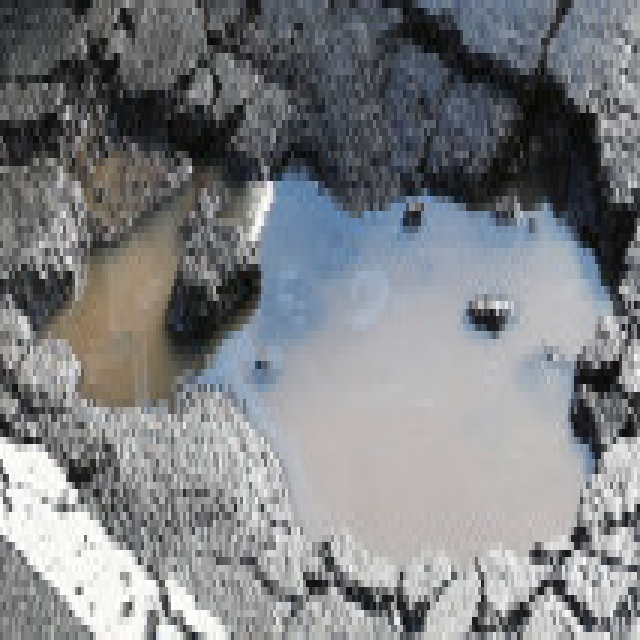

pothole3


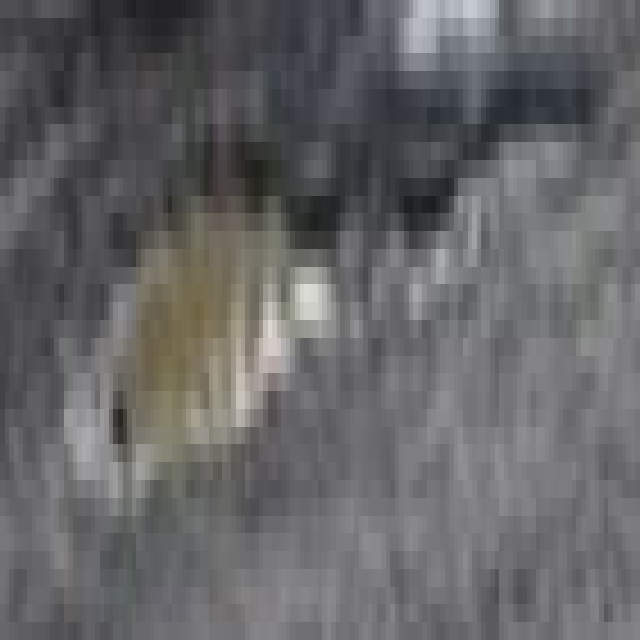

pothole3


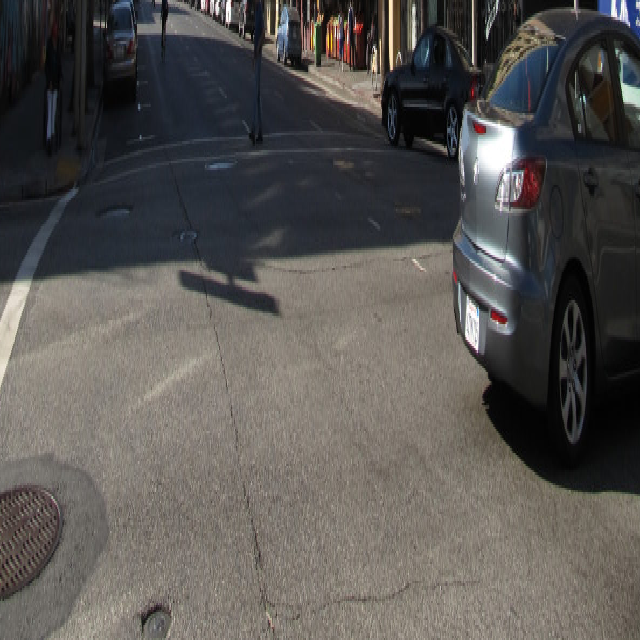

pothole0


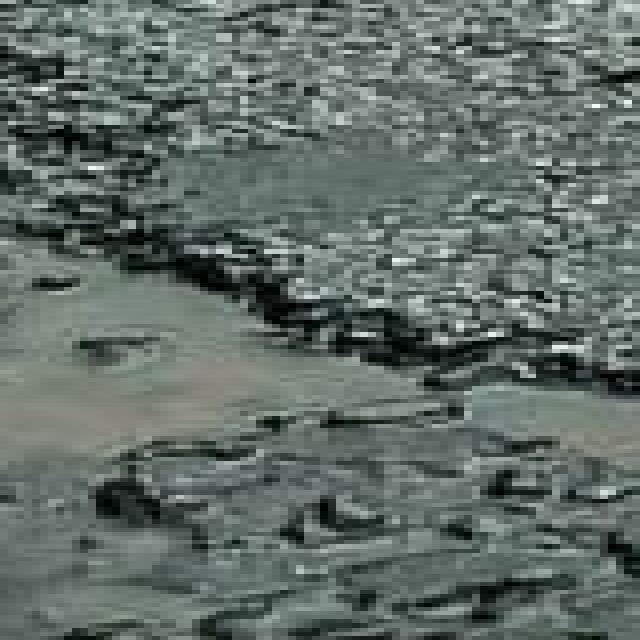

pothole1


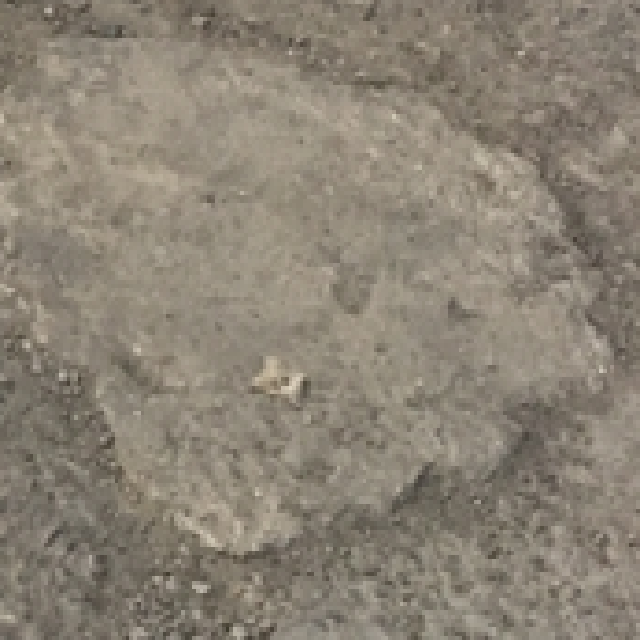

pothole2


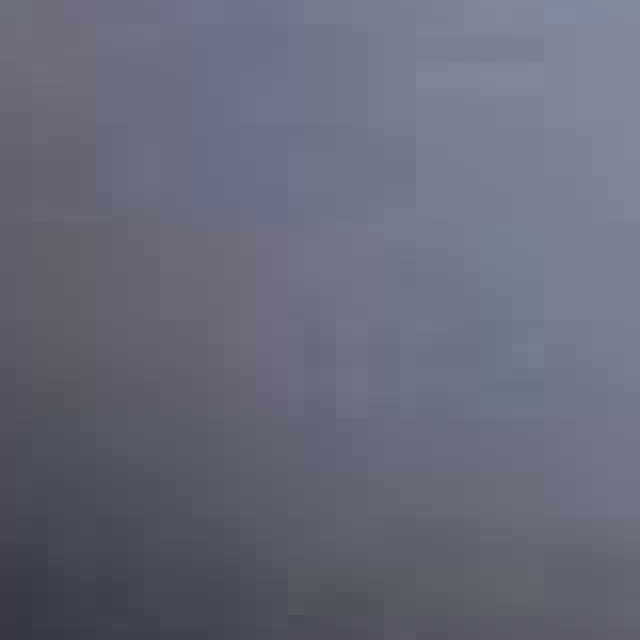

pothole0


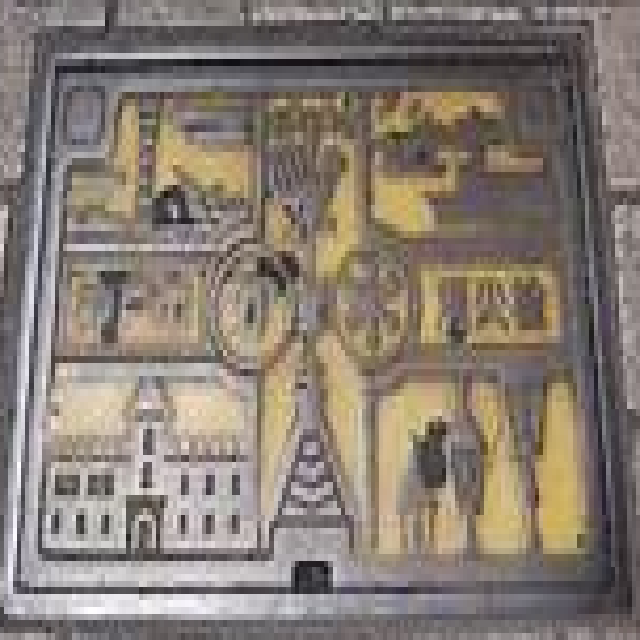

pothole0


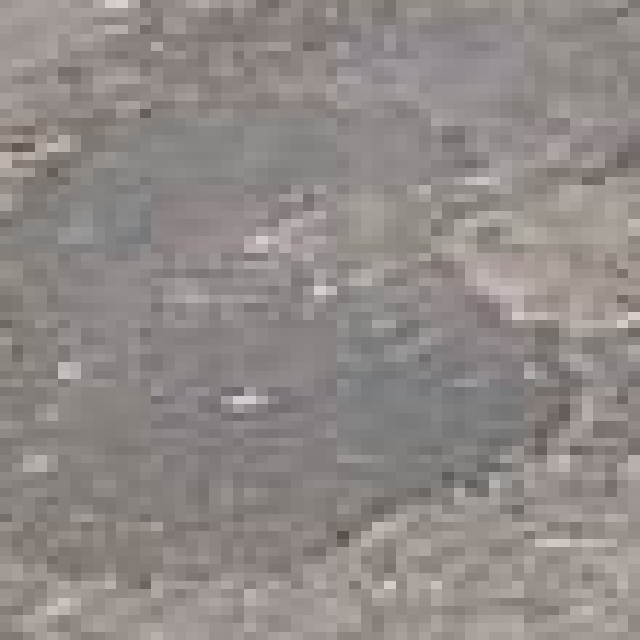

pothole1


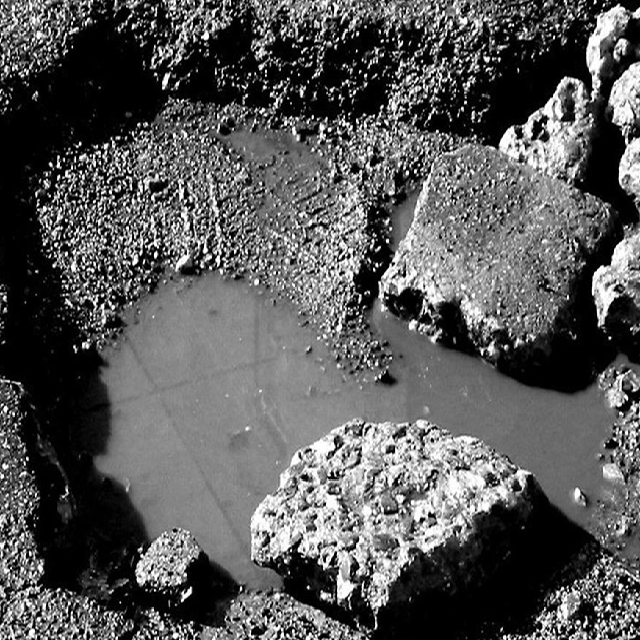

pothole3


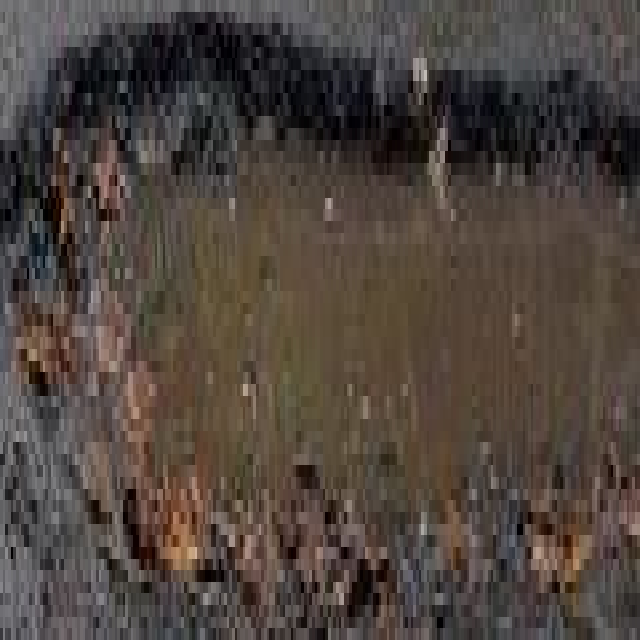

pothole4


In [8]:
import pathlib
import IPython.display as display
from PIL import Image
import os
import random


data_root = pathlib.Path('C:/Users/kles9/Desktop/CmpE257/CmpE257_team_project')
training_objs = list(data_root.glob('training_objects/*.png'))
training_objs = [str(path) for path in training_objs]
random.shuffle(training_objs)

for i in range(10):
    display.display(display.Image(training_objs[i]))
    print(os.path.basename(training_objs[i])[0:8])